In [1]:
import os
import sys


import h5py
import numpy as np
import pandas as pd

In [2]:
from scipy import stats
from scipy.stats import mannwhitneyu

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import itertools

In [5]:
from ipywidgets import widgets
from IPython import display

In [6]:
import tqdm
from joblib import Parallel, delayed

# Get the data

In [7]:
path_metadata = '/data/longterm/10/athira/paper_tierpsy_behavior_v0/metadata/20210209_metadata_1743_of_4086_exps.pickle'

In [8]:
df_metadata = pd.read_pickle(path_metadata)

In [9]:
df_features = pd.read_pickle('/data/longterm/10/athira/Aug06_features_combined_LightStimuli.pickle')

In [10]:
df_features.reset_index(drop=True, inplace=True)
df_features

frames                                           filename  drug  \
0            3  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
1            8  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
2           10  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
3           13  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
4           15  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
...        ...                                                ...   ...   
976212    5100  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976213    5101  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976214    5102  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976215    5103  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976216    5104  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   

        light stimuli_name stim_stat  curv_head  speed_x_head  speed_y_head  \
0       Light         blue      None   0.008654      1.582837      2.200000   
1       Light         blue      None   0.051312      1.800598      2.471887   
2       Light         blue      None   0.056092     -0.451324      3.500000   
3       Light         blue      None   0.024868     -0.392069      1.948385   
4       Light         blue      None   0.024588     -4.324158      2.175842   
...       ...          ...       ...        ...           ...           ...   
976212  Light        white      None   0.001274      0.000000     -0.164215   
976213  Light        white      None   0.001464      0.000000      0.030334   
976214  Light        white      None  -0.004669     -0.630402      0.041504   
976215  Light        white      None  -0.000414      0.630402      0.731262   
976216  Light        white      None   0.002408      0.000000     -0.137543   

        speed_head  ...  rel_tan_tail_mid  rel_tan_tail_post_mid  \
0         2.710235  ...         -0.055816              -1.220291   
1         3.058166  ...          0.307064               0.317399   
2         3.528979  ...          0.452221              -0.002819   
3         1.987441  ...          0.074405              -0.634982   
4         4.840726  ...         -0.412989              -1.383368   
...            ...  ...               ...                    ...   
976212    0.164215  ...         -0.301561              -0.236044   
976213    0.030334  ...         -0.263721              -0.236688   
976214    0.631766  ...         -0.287359              -0.287359   
976215    0.965479  ...         -0.219792              -0.219793   
976216    0.137543  ...         -0.317438              -0.236125   

        rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5  \
0              -0.991026 -0.321520  0.018623  0.525497 -0.204462 -0.499783   
1              -0.693456 -0.082744  0.133616  0.350841 -0.005826 -0.105237   
2              -1.021597 -0.208659  0.072926  0.753669  0.053136 -0.136477   
3              -0.864202 -0.120323  0.124137  0.287274 -0.088146 -0.078393   
4              -0.355646 -0.286930 -0.214633 -0.065735 -0.568612 -0.389495   
...                  ...       ...       ...       ...       ...       ...   
976212         -0.396025 -0.020728  0.015803 -0.005523  0.006373  0.001200   
976213         -0.400613 -0.022885  0.018265 -0.001320  0.009915  0.009163   
976214         -0.399611 -0.018111  0.032369 -0.025946 -0.001572  0.007484   
976215         -0.301602 -0.022867  0.021151 -0.008586  0.010159  0.009890   
976216         -0.399656 -0.020838  0.017728 -0.003804  0.007698  0.001172   

          ects_6  quirkness  
0      -0.542985   0.972898  
1      -0.124100   0.994009  
2      -0.214775   0.986694  
3      -0.123716   0.989737  
4      -0.259088   0.974992  
...          ...        ...  
976212  0.001511   0.998556  
976213 -0.003717   0.998536  
976214 -0.008369   0.998268  
976215 -0.002775   0.998546  
976216  0.000687   0.998714  

[976217 rows x 61 columns]

In [11]:
df_features_combined = pd.merge(df_features, df_metadata[['filename','light_150']], left_on=['filename'], right_on=['filename'],
        left_index=True, how='left' )


In [12]:
df_features_combined.reset_index(drop=True, inplace=True)
df_features_combined

frames                                           filename  drug  \
0            3  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
1            8  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
2           10  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
3           13  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
4           15  20181127_143624_1_5m0s_None_None_Light_INVERTE...  None   
...        ...                                                ...   ...   
976212    5100  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976213    5101  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976214    5102  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976215    5103  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
976216    5104  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   

        light stimuli_name stim_stat  curv_head  speed_x_head  speed_y_head  \
0       Light         blue      None   0.008654      1.582837      2.200000   
1       Light         blue      None   0.051312      1.800598      2.471887   
2       Light         blue      None   0.056092     -0.451324      3.500000   
3       Light         blue      None   0.024868     -0.392069      1.948385   
4       Light         blue      None   0.024588     -4.324158      2.175842   
...       ...          ...       ...        ...           ...           ...   
976212  Light        white      None   0.001274      0.000000     -0.164215   
976213  Light        white      None   0.001464      0.000000      0.030334   
976214  Light        white      None  -0.004669     -0.630402      0.041504   
976215  Light        white      None  -0.000414      0.630402      0.731262   
976216  Light        white      None   0.002408      0.000000     -0.137543   

        speed_head  ...  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1  \
0         2.710235  ...              -1.220291         -0.991026 -0.321520   
1         3.058166  ...               0.317399         -0.693456 -0.082744   
2         3.528979  ...              -0.002819         -1.021597 -0.208659   
3         1.987441  ...              -0.634982         -0.864202 -0.120323   
4         4.840726  ...              -1.383368         -0.355646 -0.286930   
...            ...  ...                    ...               ...       ...   
976212    0.164215  ...              -0.236044         -0.396025 -0.020728   
976213    0.030334  ...              -0.236688         -0.400613 -0.022885   
976214    0.631766  ...              -0.287359         -0.399611 -0.018111   
976215    0.965479  ...              -0.219793         -0.301602 -0.022867   
976216    0.137543  ...              -0.236125         -0.399656 -0.020838   

          ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150  
0       0.018623  0.525497 -0.204462 -0.499783 -0.542985   0.972898      False  
1       0.133616  0.350841 -0.005826 -0.105237 -0.124100   0.994009      False  
2       0.072926  0.753669  0.053136 -0.136477 -0.214775   0.986694      False  
3       0.124137  0.287274 -0.088146 -0.078393 -0.123716   0.989737      False  
4      -0.214633 -0.065735 -0.568612 -0.389495 -0.259088   0.974992      False  
...          ...       ...       ...       ...       ...        ...        ...  
976212  0.015803 -0.005523  0.006373  0.001200  0.001511   0.998556       True  
976213  0.018265 -0.001320  0.009915  0.009163 -0.003717   0.998536       True  
976214  0.032369 -0.025946 -0.001572  0.007484 -0.008369   0.998268       True  
976215  0.021151 -0.008586  0.010159  0.009890 -0.002775   0.998546       True  
976216  0.017728 -0.003804  0.007698  0.001172  0.000687   0.998714       True  

[976217 rows x 62 columns]

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
df_light = df_features_combined[(df_features_combined['light_150'] == True)]

In [15]:
df_light.groupby(by = ['drug', 'stimuli_name','stim_stat']).count()['frames']

drug        stimuli_name  stim_stat 
AA          blue          None           27808
                          tOFFafter        304
                          tOFFbefore      1062
                          tONafter         304
                          tONbefore       1196
            green         None           28393
                          tOFFafter        301
                          tOFFbefore      1322
                          tONafter         327
                          tONbefore       1646
            red           None           30107
                          tOFFafter        377
                          tOFFbefore      1477
                          tONafter         371
                          tONbefore       1441
            white         None           50971
                          tOFFafter        528
                          tOFFbefore      1890
                          tONafter         493
                          tONbefore       2061
Dopamine    blue       

In [16]:
print(f'Total number of frames in the light dataset:  {len(df_light.index)}')

Total number of frames in the light dataset:  773256


In [17]:
print(f'Total number of experiments in the light dataset:  {len(list(df_light.filename.unique()))}')

Total number of experiments in the light dataset:  150


In [18]:
# Control is defined as the regions/frames where there is no light stimulus
df_light_control = df_light[(df_light['stim_stat']=='None')|(df_light['stim_stat']=='tONbefore')|(df_light['stim_stat']=='tOFFafter')]
# Also, control should not have drugs, I believe
df_light_control = df_light_control[df_light_control['drug']=='None']

print(f'Total number of frames in the control subset:  {len(df_light_control.index)}')
assert(len(list(df_light_control.filename.unique())) <= len(list(df_light.filename.unique())))

Total number of frames in the control subset:  462326


In [86]:
# For test 1, we compare the effect of switching ON or OFF the light. 
df_light_roi = df_light[df_light['stim_stat']!='None']
# Also, for test 1, I guess, we consider only no drug cases
df_light_roi = df_light_roi[df_light_roi['drug']=='None']

print(f'Total number of frames in the test1 subset:  {len(df_light_roi.index)}')
print(f'Total number of experiments in the test1 subset:  {len(list(df_light_roi.filename.unique()))}')
assert(len(list(df_light_roi.filename.unique())) <= len(list(df_light.filename.unique())))

Total number of frames in the test1 subset:  62848
Total number of experiments in the test1 subset:  101


In [72]:
# For test 2, we compare the effect of switching ON or OFF the light. 
df_light_drugs = df_light[df_light['stim_stat']=='tOFFafter']

print(f'Total number of frames in the test2 subset:  {len(df_light_drugs.index)}')
print(f'Total number of experiments in the test2 subset:  {len(list(df_light_drugs.filename.unique()))}')
assert(len(list(df_light_drugs.filename.unique())) <= len(list(df_light.filename.unique())))

Total number of frames in the test2 subset:  8325
Total number of experiments in the test2 subset:  113


In [21]:
params_list = df_light.columns.to_list()

In [22]:
params_list.remove('light_150')
params_list.remove('frames')
params_list.remove('filename')
params_list.remove('drug')
params_list.remove('light')
params_list.remove('stimuli_name')
params_list.remove('stim_stat')
print(params_list)

['curv_head', 'speed_x_head', 'speed_y_head', 'speed_head', 'tan_head', 'angvel_head', 'curv_neck', 'speed_x_neck', 'speed_y_neck', 'speed_neck', 'tan_neck', 'angvel_neck', 'curv_tail_base', 'speed_x_tail_base', 'speed_y_tail_base', 'speed_tail_base', 'tan_tail_base', 'angvel_tail_base', 'curv_tail_pre_mid', 'speed_x_tail_pre_mid', 'speed_y_tail_pre_mid', 'speed_tail_pre_mid', 'tan_tail_pre_mid', 'angvel_tail_pre_mid', 'curv_tail_mid', 'speed_x_tail_mid', 'speed_y_tail_mid', 'speed_tail_mid', 'tan_tail_mid', 'angvel_tail_mid', 'curv_tail_post_mid', 'speed_x_tail_post_mid', 'speed_y_tail_post_mid', 'speed_tail_post_mid', 'tan_tail_post_mid', 'angvel_tail_post_mid', 'curv_tail_tip', 'speed_x_tail_tip', 'speed_y_tail_tip', 'speed_tail_tip', 'tan_tail_tip', 'angvel_tail_tip', 'rel_tan_neck', 'rel_tan_tail_base', 'rel_tan_tail_pre_mid', 'rel_tan_tail_mid', 'rel_tan_tail_post_mid', 'rel_tan_tail_tip', 'ects_1', 'ects_2', 'ects_3', 'ects_4', 'ects_5', 'ects_6', 'quirkness']


In [23]:
speed_xys = ['speed_x_head', 'speed_y_head','speed_x_neck', 'speed_y_neck','speed_x_tail_base', 'speed_y_tail_base',
 'speed_x_tail_pre_mid', 'speed_y_tail_pre_mid','speed_x_tail_mid', 'speed_y_tail_mid',
 'speed_x_tail_post_mid', 'speed_y_tail_post_mid','speed_x_tail_tip', 'speed_y_tail_tip']
for sp_ in speed_xys:
    params_list.remove(sp_)

In [24]:
params_list

['curv_head',
 'speed_head',
 'tan_head',
 'angvel_head',
 'curv_neck',
 'speed_neck',
 'tan_neck',
 'angvel_neck',
 'curv_tail_base',
 'speed_tail_base',
 'tan_tail_base',
 'angvel_tail_base',
 'curv_tail_pre_mid',
 'speed_tail_pre_mid',
 'tan_tail_pre_mid',
 'angvel_tail_pre_mid',
 'curv_tail_mid',
 'speed_tail_mid',
 'tan_tail_mid',
 'angvel_tail_mid',
 'curv_tail_post_mid',
 'speed_tail_post_mid',
 'tan_tail_post_mid',
 'angvel_tail_post_mid',
 'curv_tail_tip',
 'speed_tail_tip',
 'tan_tail_tip',
 'angvel_tail_tip',
 'rel_tan_neck',
 'rel_tan_tail_base',
 'rel_tan_tail_pre_mid',
 'rel_tan_tail_mid',
 'rel_tan_tail_post_mid',
 'rel_tan_tail_tip',
 'ects_1',
 'ects_2',
 'ects_3',
 'ects_4',
 'ects_5',
 'ects_6',
 'quirkness']

In [25]:
short_params_list =  ['curv_neck',
'curv_tail_base',
'curv_tail_pre_mid',
'curv_tail_mid',
'curv_tail_post_mid',
'curv_tail_tip',
'rel_tan_neck',
'rel_tan_tail_base',
'rel_tan_tail_pre_mid',
'rel_tan_tail_mid',
'rel_tan_tail_post_mid',
'rel_tan_tail_tip',
'ects_1',
'ects_2',
'ects_3',
'ects_4',
'ects_5',
'ects_6',
'quirkness',
'speed_neck',
'speed_tail_base',
'speed_tail_pre_mid',
'speed_tail_mid',
'speed_tail_post_mid',                                       
'speed_tail_tip']

In [26]:
# short_params_list = sorted(short_params_list)

In [27]:
# params = sorted(params_list)

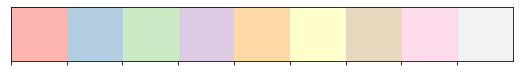

In [28]:
cpal = sns.color_palette("Pastel1",9)
sns.palplot(cpal)

In [29]:
color_dict = {'red':cpal[0], 'green':cpal[2], 'blue':cpal[1],'white':cpal[-1] }

In [30]:
stim_order = list(df_light_control.stimuli_name.unique())
stim_color_order = [color_dict[x] for x in stim_order]

# SMD and SSMD

## Test1 

## ssmd

In [36]:
df_test1_on = df_light_roi[(df_light_roi['stim_stat']=='tONbefore')|(df_light_roi['stim_stat']=='tONafter')]

In [37]:
df_means_on = df_test1_on.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].mean()
df_var_on = df_test1_on.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].var()

### Saving mean and std as excel

In [38]:
df_means_on


curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
stimuli_name stim_stat                                                                                                                                                                                                                                                                                                                                                                                               
blue         tONafter    0.003235        0.001783           0.001916       0.003863            0.003315      -0.003114      0.095631           0.358357              0.336485          0.382618               0.436584          0.401166  0.011657 -0.012041  0.014980  0.009329  0.008167  0.000091   0.982137    1.080154         1.169113            1.420328        1.412951             1.314958        1.541823
             tONbefore   0.003098        0.002784           0.002435       0.005119            0.003709      -0.000635      0.053345           0.323769              0.317541          0.407916               0.457044          0.468197  0.014859 -0.017034  0.013212  0.009440  0.006725 -0.001348   0.978091    1.496152         1.932885            2.559382        2.582926             2.448425        2.982269
green        tONafter    0.001128        0.003828           0.001119       0.001771           -0.000497      -0.009031     -0.146012          -0.161425             -0.269879         -0.263089              -0.235795         -0.164344 -0.000902  0.006853  0.016293  0.012402  0.012692 -0.001842   0.980378    2.165766         2.515822            2.950345        3.087359             3.005917        3.627262
             tONbefore   0.002615        0.004790           0.001136       0.002147            0.000317      -0.007224     -0.124947          -0.171520             -0.272014         -0.250539              -0.232461         -0.179688  0.003597 -0.001304  0.019513  0.010472  0.010135 -0.001073   0.976080    2.550075         3.110159            3.855484        3.941572             3.831348        4.722651
red          tONafter   -0.001153       -0.001948          -0.003107      -0.000432           -0.002513      -0.006567     -0.117410          -0.086217             -0.041254         -0.041565              -0.063312         -0.123535 -0.013679 -0.005549  0.021850  0.004460  0.007553  0.000250   0.981293    1.774478         2.027035            2.521166        2.674235             2.519656        3.008626
             tONbefore   0.001221        0.000679          -0.001100       0.000445           -0.001462      -0.005900     -0.002210           0.081803              0.166115         -0.071355              -0.096195         -0.044627 -0.003380 -0.009831  0.026626  0.001968  0.006546 -0.000431   0.977991    2.114155         2.563269            3.262463        3.422193             3.301091        4.088333
white        tONafter    0.002750        0.005457           0.005283       0.006305            0.010181       0.002358     -0.043428          -0.000988              0.017520          0.029555               0.041761          0.043296  0.033740 -0.007738 -0.006191  0.005446  0.012511  0.005168   0.966072    3.948612         4.947106            6.368365        6.465890             6.297163        7.940186
             tONbefore   0.004387        0.005601           0.006016       0.008007            0.007357       0.001964      0.001747           0.029490              0.034766          0.081384               0.120585          0.173075  0.034134 -0.010368  0.000336  0.007066  0.010830 -0.001546   0.965626    4.392009         5.454174            6.982349        7.293913  

In [40]:
df_std_on = df_test1_on.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].std()

### ssmd calc contd..

In [ ]:
list_ssmd_dicts = []
for param in short_params_list:
    
    ssmd_dict = {}
    ssmd_dict['param'] = param
    
    
    for stim in ['red','green','blue','white']:
        
        stim_mean = df_means_on.loc[stim,'tONafter'][param]
        stim_var = df_var_on.loc[stim,'tONafter'][param]
        
        control_mean = df_means_on.loc[stim,'tONbefore'][param]
        control_var = df_var_on.loc[stim,'tONbefore'][param]
        
        ssmd_dict[stim] = (stim_mean - control_mean) / np.sqrt(stim_var + control_var)
        
    list_ssmd_dicts.append(ssmd_dict)
        
    

In [ ]:
ssmd_df  = pd.DataFrame(list_ssmd_dicts).set_index('param')

In [ ]:
ssmd_df

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(ssmd_df.T, cmap= 'bwr', square=True, ax=axes, center=0, 
            cbar = True, cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Strictly standardized mean difference light ON')
axes.set_yticklabels(axes.get_yticklabels(),rotation= 0)

fig.savefig('./Figures/ssmd_smd/ssmd_lightt1_on_subset.svg')

In [42]:
df_test1_off = df_light_roi[(df_light_roi['stim_stat']=='tOFFbefore')|(df_light_roi['stim_stat']=='tOFFafter')]

In [43]:
df_means_off = df_test1_off.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].mean()
df_var_off = df_test1_off.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].var()

In [44]:

df_std_off = df_test1_off.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].std()

In [ ]:
list_ssmd_dicts_off = []
for param in short_params_list:
    
    ssmd_dict_off = {}
    ssmd_dict_off['param'] = param
    
    
    for stim in ['red','green','blue','white']:
        
        stim_mean = df_means_off.loc[stim,'tOFFafter'][param]
        stim_var = df_var_off.loc[stim,'tOFFafter'][param]
        
        control_mean = df_means_off.loc[stim,'tOFFbefore'][param]
        control_var = df_var_off.loc[stim,'tOFFbefore'][param]
        
        ssmd_dict_off[stim] = (stim_mean - control_mean) / np.sqrt(stim_var + control_var)
        
    list_ssmd_dicts_off.append(ssmd_dict_off)
        
    

In [ ]:
ssmd_off_df  = pd.DataFrame(list_ssmd_dicts_off).set_index('param')
ssmd_off_df

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(ssmd_off_df.T, cmap= 'bwr', square=True, ax=axes, center=0, 
            cbar = True, cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Strictly standardized mean difference light OFF')
axes.set_yticklabels(axes.get_yticklabels(),rotation= 0)
fig.savefig('./Figures/ssmd_smd/ssmd_lightt1_off_subset.svg')

In [47]:
abb_dict = {'curv_neck':'cN',
 'curv_tail_base':'cTB',
 'curv_tail_pre_mid':'cTprM',
 'curv_tail_mid':'cTM',
 'curv_tail_post_mid':'cTpoM',
 'curv_tail_tip':'cTT',
 'rel_tan_neck':'rtN',
 'rel_tan_tail_base':'rtTB',
 'rel_tan_tail_pre_mid':'rtTprM',
 'rel_tan_tail_mid':'rtTM',
 'rel_tan_tail_post_mid':'rtTpoM',
 'rel_tan_tail_tip':'rtTT',
 'ects_1':'EC1',
 'ects_2':'EC2',
 'ects_3':'EC3',
 'ects_4':'EC4',
 'ects_5':'EC5',
 'ects_6':'EC6',
 'quirkness':'Quirkiness',
 'speed_neck':'sN',
 'speed_tail_base':'sTB',
 'speed_tail_pre_mid':'sTprM',
 'speed_tail_mid':'sTM',
 'speed_tail_post_mid':'sTpoM',
 'speed_tail_tip':'sTT'}

In [48]:
df_means_on_short = df_means_on[short_params_list].rename(abb_dict, axis='columns')
df_means_on_short

cN       cTB     cTprM       cTM     cTpoM       cTT       rtN      rtTB    rtTprM      rtTM    rtTpoM      rtTT       EC1       EC2       EC3       EC4       EC5       EC6  Quirkiness        sN       sTB     sTprM       sTM     sTpoM       sTT
stimuli_name stim_stat                                                                                                                                                                                                                                                            
blue         tONafter   0.003235  0.001783  0.001916  0.003863  0.003315 -0.003114  0.095631  0.358357  0.336485  0.382618  0.436584  0.401166  0.011657 -0.012041  0.014980  0.009329  0.008167  0.000091    0.982137  1.080154  1.169113  1.420328  1.412951  1.314958  1.541823
             tONbefore  0.003098  0.002784  0.002435  0.005119  0.003709 -0.000635  0.053345  0.323769  0.317541  0.407916  0.457044  0.468197  0.014859 -0.017034  0.013212  0.009440  0.006725 -0.001348    0.978091  1.496152  1.932885  2.559382  2.582926  2.448425  2.982269
green        tONafter   0.001128  0.003828  0.001119  0.001771 -0.000497 -0.009031 -0.146012 -0.161425 -0.269879 -0.263089 -0.235795 -0.164344 -0.000902  0.006853  0.016293  0.012402  0.012692 -0.001842    0.980378  2.165766  2.515822  2.950345  3.087359  3.005917  3.627262
             tONbefore  0.002615  0.004790  0.001136  0.002147  0.000317 -0.007224 -0.124947 -0.171520 -0.272014 -0.250539 -0.232461 -0.179688  0.003597 -0.001304  0.019513  0.010472  0.010135 -0.001073    0.976080  2.550075  3.110159  3.855484  3.941572  3.831348  4.722651
red          tONafter  -0.001153 -0.001948 -0.003107 -0.000432 -0.002513 -0.006567 -0.117410 -0.086217 -0.041254 -0.041565 -0.063312 -0.123535 -0.013679 -0.005549  0.021850  0.004460  0.007553  0.000250    0.981293  1.774478  2.027035  2.521166  2.674235  2.519656  3.008626
             tONbefore  0.001221  0.000679 -0.001100  0.000445 -0.001462 -0.005900 -0.002210  0.081803  0.166115 -0.071355 -0.096195 -0.044627 -0.003380 -0.009831  0.026626  0.001968  0.006546 -0.000431    0.977991  2.114155  2.563269  3.262463  3.422193  3.301091  4.088333
white        tONafter   0.002750  0.005457  0.005283  0.006305  0.010181  0.002358 -0.043428 -0.000988  0.017520  0.029555  0.041761  0.043296  0.033740 -0.007738 -0.006191  0.005446  0.012511  0.005168    0.966072  3.948612  4.947106  6.368365  6.465890  6.297163  7.940186
             tONbefore  0.004387  0.005601  0.006016  0.008007  0.007357  0.001964  0.001747  0.029490  0.034766  0.081384  0.120585  0.173075  0.034134 -0.010368  0.000336  0.007066  0.010830 -0.001546    0.965626  4.392009  5.454174  6.982349  7.293913  6.990378  8.770976

In [49]:
df_std_on_short = df_std_on[short_params_list].rename(abb_dict, axis='columns')
df_std_on_short

cN       cTB     cTprM       cTM     cTpoM       cTT       rtN      rtTB    rtTprM      rtTM    rtTpoM      rtTT       EC1       EC2       EC3       EC4       EC5       EC6  Quirkiness        sN       sTB     sTprM       sTM     sTpoM        sTT
stimuli_name stim_stat                                                                                                                                                                                                                                                             
blue         tONafter   0.016408  0.018632  0.012652  0.010878  0.012869  0.014323  0.516167  1.295639  1.321822  1.320931  1.337975  1.371477  0.065596  0.060256  0.037819  0.031348  0.025843  0.018519    0.058908  1.314569  1.843224  3.138008  3.137898  2.849227   4.259345
             tONbefore  0.016601  0.018780  0.016076  0.016639  0.016978  0.021103  0.673776  1.372491  1.416395  1.514688  1.510384  1.562974  0.075079  0.066656  0.052326  0.036676  0.029065  0.022967    0.059149  2.194064  3.459357  5.515902  5.630789  5.157370   6.975078
green        tONafter   0.018137  0.022723  0.023173  0.017609  0.019042  0.034478  1.161550  1.156073  1.498678  1.590219  1.570190  1.474966  0.076939  0.088718  0.093485  0.076930  0.069619  0.060106    0.053598  3.175668  4.012120  5.437458  5.837584  5.875193   7.689250
             tONbefore  0.019442  0.024794  0.024263  0.020613  0.021444  0.032601  1.197503  1.318483  1.590701  1.648617  1.648661  1.580165  0.083876  0.083356  0.098048  0.073659  0.071347  0.059196    0.057847  3.567288  4.895109  6.829588  7.121018  6.927355   9.032495
red          tONafter   0.016340  0.018328  0.016417  0.014184  0.013829  0.018044  1.208014  1.027921  1.950126  1.947167  1.950343  1.928336  0.068156  0.051347  0.064693  0.037479  0.030362  0.021898    0.050363  2.570947  3.379948  5.047459  5.602258  5.170626   6.506928
             tONbefore  0.017904  0.019891  0.019221  0.018998  0.016412  0.019092  1.016421  0.999794  1.703121  2.045498  2.081606  1.942126  0.077288  0.059252  0.071511  0.042111  0.033478  0.024981    0.063368  3.119687  4.301240  6.263323  6.754698  6.466903   8.279901
white        tONafter   0.016742  0.018185  0.022600  0.028899  0.027761  0.030036  0.700966  0.853555  1.100157  1.309439  1.493043  1.595411  0.087258  0.072191  0.079102  0.058436  0.035229  0.035683    0.077309  4.975624  6.308659  8.796244  9.253398  9.212783  11.993816
             tONbefore  0.014780  0.017979  0.020859  0.030656  0.028647  0.025034  0.706574  0.820330  1.147012  1.391907  1.580814  1.593203  0.089225  0.060630  0.070370  0.062107  0.037625  0.029968    0.077462  5.065771  6.336153  8.804536  9.280867  8.994679  11.700810

In [50]:
df_means_off_short = df_means_off[short_params_list].rename(abb_dict, axis='columns')
df_means_off_short

cN       cTB     cTprM       cTM     cTpoM       cTT       rtN      rtTB    rtTprM      rtTM    rtTpoM      rtTT       EC1       EC2       EC3       EC4       EC5       EC6  Quirkiness        sN       sTB     sTprM       sTM     sTpoM       sTT
stimuli_name stim_stat                                                                                                                                                                                                                                                             
blue         tOFFafter   0.003184  0.003878  0.000667  0.004987  0.005282 -0.001553  0.020792 -0.000198 -0.010237  0.019387 -0.150127 -0.382983  0.014756 -0.016271  0.012928  0.007956  0.009661  0.004164    0.970250  2.114107  2.538834  3.286951  3.465689  3.382988  4.102651
             tOFFbefore  0.000691  0.001321  0.000540  0.003003  0.003610 -0.004590  0.037082  0.042153  0.007577  0.034850  0.036190 -0.165745  0.004739 -0.013797  0.018932  0.011742  0.008647  0.003790    0.979764  1.668285  1.884149  2.340979  2.372739  2.246897  2.668264
green        tOFFafter   0.001984  0.001724 -0.001908 -0.000982  0.000086 -0.003819 -0.265393 -0.267061 -0.271442 -0.285060 -0.313191 -0.331275 -0.001153 -0.009365  0.019792 -0.003071  0.003992  0.003373    0.961568  3.791368  4.461551  5.598649  5.383354  4.678900  5.857054
             tOFFbefore  0.000969  0.000022 -0.001076  0.001760  0.001697 -0.003967 -0.251149 -0.290847 -0.274960 -0.253830 -0.236222 -0.246535  0.000181 -0.011364  0.017406  0.007145  0.005170  0.004203    0.970890  3.008660  3.455789  4.195600  4.140616  3.668087  4.238851
red          tOFFafter   0.002713 -0.000051  0.000959  0.003200  0.000741 -0.007291  0.021234  0.302026  0.352024  0.344651  0.327169  0.323080  0.002736 -0.002934  0.021897  0.011884  0.010521 -0.000794    0.964582  2.813464  3.671302  4.559659  4.517788  4.108039  5.309422
             tOFFbefore  0.003239  0.000276  0.002415  0.003942  0.000032 -0.007220  0.043866  0.064429  0.051393  0.075846  0.081181  0.019284  0.004283 -0.009200  0.028091  0.013734  0.009794 -0.004852    0.976749  1.914608  2.332143  2.924912  3.025822  2.666818  3.029439
white        tOFFafter   0.003195  0.003917  0.002766  0.004231  0.005226  0.003860  0.000431  0.039412  0.235221  0.246834  0.272717  0.316043  0.020027 -0.016983  0.001195  0.000710  0.007974 -0.001557    0.962462  4.465503  5.755826  7.376343  7.556461  7.095316  9.076006
             tOFFbefore  0.003675  0.004983  0.003776  0.005763  0.008591  0.003344 -0.068097  0.003341  0.003481 -0.000248  0.066694  0.138434  0.027665 -0.017762 -0.001973  0.004065  0.009941  0.004009    0.971093  3.564723  4.315377  5.539548  5.801790  5.581027  6.786607

In [51]:
df_std_off_short = df_std_off[short_params_list].rename(abb_dict, axis='columns')
df_std_off_short

cN       cTB     cTprM       cTM     cTpoM       cTT       rtN      rtTB    rtTprM      rtTM    rtTpoM      rtTT       EC1       EC2       EC3       EC4       EC5       EC6  Quirkiness        sN       sTB     sTprM       sTM     sTpoM        sTT
stimuli_name stim_stat                                                                                                                                                                                                                                                              
blue         tOFFafter   0.017681  0.022159  0.017949  0.020084  0.020084  0.018456  0.500481  0.789136  0.880331  1.055565  1.425666  1.574747  0.090573  0.056777  0.052433  0.041637  0.033445  0.018241    0.079919  3.281048  4.411665  6.325869  6.909163  6.836607   8.542028
             tOFFbefore  0.016998  0.018595  0.016110  0.016281  0.017150  0.017151  0.439343  0.538147  0.696864  0.809232  1.259314  1.653372  0.075278  0.054448  0.054037  0.039848  0.034281  0.019739    0.064013  2.883184  3.659187  5.267078  5.649022  5.404001   7.140185
green        tOFFafter   0.022042  0.023286  0.025600  0.023717  0.021128  0.026683  1.385822  1.506715  1.498312  1.481050  1.543174  1.573726  0.102081  0.073127  0.090433  0.057535  0.044167  0.025965    0.078276  6.296001  6.928272  8.943845  8.866975  7.636685   9.996606
             tOFFbefore  0.017955  0.021021  0.022079  0.021659  0.018994  0.020155  1.452339  1.455956  1.447800  1.477092  1.515764  1.587253  0.093021  0.070918  0.074434  0.048596  0.036338  0.022078    0.059390  4.812453  5.707374  7.630966  7.813054  7.100270   8.972783
red          tOFFafter   0.016316  0.020704  0.024132  0.025890  0.021428  0.019161  1.088309  1.651521  1.852906  1.994607  2.050022  2.044015  0.099244  0.072336  0.069088  0.050888  0.036904  0.027684    0.077814  3.781620  5.780805  7.906700  7.840102  6.855978   9.241100
             tOFFbefore  0.015353  0.017695  0.019549  0.020596  0.018492  0.020136  0.623264  0.686270  0.865553  1.007033  1.134318  1.188941  0.079576  0.058728  0.062976  0.045196  0.037534  0.026087    0.053767  2.834575  4.214039  6.127038  6.577673  5.768597   6.903480
white        tOFFafter   0.014616  0.020123  0.022264  0.029628  0.027627  0.028838  0.898355  0.946150  1.495662  1.629941  1.749719  1.740146  0.098773  0.063879  0.068460  0.058614  0.037541  0.030148    0.084818  5.051391  6.521304  9.069219  9.432609  9.017877  11.854500
             tOFFbefore  0.013803  0.017403  0.021480  0.029655  0.027741  0.035383  0.844200  0.800832  1.041022  1.236649  1.402197  1.478664  0.088154  0.074471  0.074477  0.059281  0.040333  0.039905    0.077329  4.722006  5.675731  7.907319  8.654875  8.470429  10.802779

In [52]:
writer_11 = pd.ExcelWriter('meanstd_violinplots_lights_test1.xlsx', engine='openpyxl')

# Write each dataframe to a different worksheet.
df_means_on_short.to_excel(writer_11, sheet_name='mean_on')
df_std_on_short.to_excel(writer_11, sheet_name='std_on')

df_means_off_short.to_excel(writer_11, sheet_name='mean_off')
df_std_off_short.to_excel(writer_11, sheet_name='std_off')

# Close the Pandas Excel writer and output the Excel file.
writer_11.save()

## smd

In [ ]:
df_median_on = df_test1_on.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].median()
df_mad_on = df_test1_on.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].mad()

In [ ]:
list_smd_dicts = []
for param in (short_params_list):
    
    smd_dict = {}
    smd_dict['param'] = param
    
    
    for stim in ['red','green','blue','white']:
        
        stim_median = df_median_on.loc[stim,'tONafter'][param]
        stim_mad = df_mad_on.loc[stim,'tONafter'][param]
        
        control_median = df_median_on.loc[stim,'tONbefore'][param]
        control_mad = df_mad_on.loc[stim,'tONbefore'][param]
        
        smd_dict[stim] = (stim_median - control_median) / np.sqrt(stim_mad + control_mad)
        
    list_smd_dicts.append(smd_dict)
        
    

In [ ]:
df_median_off = df_test1_off.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].median()
df_mad_off = df_test1_off.groupby(by=['stimuli_name','stim_stat'], as_index=True)[short_params_list].mad()

In [ ]:
list_smd_dicts_off = []
for param in (short_params_list):
    
    smd_dict_off = {}
    smd_dict_off['param'] = param
    
    
    for stim in ['red','green','blue','white']:
        
        stim_median = df_median_off.loc[stim,'tOFFafter'][param]
        stim_mad = df_mad_off.loc[stim,'tOFFafter'][param]
        
        control_median = df_median_off.loc[stim,'tOFFbefore'][param]
        control_mad = df_mad_off.loc[stim,'tOFFbefore'][param]
        
        smd_dict_off[stim] = (stim_median - control_median) / np.sqrt(stim_mad + control_mad)
        
    list_smd_dicts_off.append(smd_dict_off)
        
    

In [ ]:
smd_on_df  = pd.DataFrame(list_smd_dicts).set_index('param')
smd_off_df  = pd.DataFrame(list_smd_dicts_off).set_index('param')

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(smd_on_df.T, cmap= 'bwr',
            square=True, ax=axes, center=0, cbar = True, 
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Standardized Median Difference light ON')
axes.set_yticklabels(axes.get_yticklabels(),rotation= 0)
fig.savefig('./Figures/ssmd_smd/smd_lightt1_on_subset.svg')

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(smd_off_df.T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True, 
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Standardized Median Difference light OFF')
axes.set_yticklabels(axes.get_yticklabels(),rotation= 0)
fig.savefig('./Figures/ssmd_smd/smd_lightt1_off_subset.svg')

## Test2

In [53]:
df_light_drugs_white = df_light_drugs[df_light_drugs['stimuli_name']=='white']

In [54]:
df_test2 = df_light_drugs_white[(df_light_drugs_white['drug']=='Fluoxetine')|(df_light_drugs_white['drug']=='None')]

In [55]:
df_means_t2 = df_test2.groupby(by=['drug'], as_index=True)[short_params_list].mean()
df_var_t2 = df_test2.groupby(by=['drug'], as_index=True)[short_params_list].var()

df_median_t2 = df_test2.groupby(by=['drug'], as_index=True)[short_params_list].median()
df_mad_t2 = df_test2.groupby(by=['drug'], as_index=True)[short_params_list].mad()

In [56]:
df_means_t2

curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
drug                                                                                                                                                                                                                                                                                                                                                                                                     
Fluoxetine   0.011449        0.012067           0.003761      -0.001483           -0.002689      -0.000402      0.046383           0.206297              0.300862          0.290102               0.250732          0.264546  0.026534  0.005523  0.018321 -0.023195 -0.004878  0.009629   0.998065    0.812452         0.823475            0.839602        0.727336             0.824507        0.721063
None         0.003195        0.003917           0.002766       0.004231            0.005226       0.003860      0.000431           0.039412              0.235221          0.246834               0.272717          0.316043  0.020027 -0.016983  0.001195  0.000710  0.007974 -0.001557   0.962462    4.465503         5.755826            7.376343        7.556461             7.095316        9.076006

In [58]:
df_std_t2 = df_test2.groupby(by=['drug'], as_index=True)[short_params_list].std()
df_std_t2

curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
drug                                                                                                                                                                                                                                                                                                                                                                                                     
Fluoxetine   0.002879        0.002260           0.002346       0.001995            0.003129       0.005063      0.097276           0.042296              0.037730          0.040421               0.042587          0.038394  0.002931  0.013011  0.010233  0.005450  0.007088  0.008130   0.000198    0.534730         0.525228            0.537552        0.561551             0.492169        0.513744
None         0.014616        0.020123           0.022264       0.029628            0.027627       0.028838      0.898355           0.946150              1.495662          1.629941               1.749719          1.740146  0.098773  0.063879  0.068460  0.058614  0.037541  0.030148   0.084818    5.051391         6.521304            9.069219        9.432609             9.017877       11.854500

In [60]:
writer_11 = pd.ExcelWriter('meanstd_violinplots_lights_test2.xlsx', engine='openpyxl')

# Write each dataframe to a different worksheet.
df_means_t2_short = df_means_t2[short_params_list].rename(abb_dict, axis='columns')
df_std_t2_short = df_std_t2[short_params_list].rename(abb_dict, axis='columns')

df_means_t2_short.to_excel(writer_11, sheet_name='mean_test2')
df_std_t2_short.to_excel(writer_11, sheet_name='std_test2')

# Close the Pandas Excel writer and output the Excel file.
writer_11.save()

In [ ]:


list_my_dicts = []
for param in sorted(short_params_list):
    
    my_dict = {}
    my_dict['param'] = param
    
    stim_mean = df_means_t2.loc['Fluoxetine'][param]
    control_mean = df_means_t2.loc['None'][param]
    stim_var = df_var_t2.loc['Fluoxetine'][param]
    control_var = df_var_t2.loc['None'][param]
    my_dict['ssmd'] = (stim_mean - control_mean) / np.sqrt(stim_var + control_var)
    
    stim_median = df_median_t2.loc['Fluoxetine'][param]
    control_median = df_median_t2.loc['None'][param]
    stim_mad = df_mad_t2.loc['Fluoxetine'][param]
    control_mad = df_mad_t2.loc['None'][param]
    my_dict['smd'] = (stim_median - control_median) / np.sqrt(stim_mad + control_mad)
    
    list_my_dicts.append(my_dict)

In [ ]:
my_df  = pd.DataFrame(list_my_dicts).set_index('param')

In [ ]:
my_df

In [ ]:
len(short_params_list)

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(my_df['ssmd'].values.reshape(1,25), cmap= 'bwr', square=True, center=0, cbar = True, ax=axes,
            cbar_kws = dict(use_gridspec=False,location="top",shrink =0.40, pad=0.2))
axes.set_xticklabels(my_df.index.to_list(), rotation=90)
axes.set_yticklabels(['Fluoxetine'], rotation=0)
axes.set_title('Strictly standardized mean difference : White light - Fluoxetine vs Control')

fig.savefig('./Figures/ssmd_smd/ssmd_lightt2.svg')

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(my_df['smd'].values.reshape(1,25), cmap= 'bwr', square=True, center=0, cbar = True, ax=axes,
            cbar_kws = dict(use_gridspec=False,location="top",shrink =0.40, pad=0.2))
axes.set_xticklabels(my_df.index.to_list(), rotation=90)
axes.set_yticklabels(['Fluoxetine'], rotation=0)
axes.set_title('Standardized median difference : White light - Fluoxetine vs Control')

fig.savefig('./Figures/ssmd_smd/smd_lightt2.svg')

In [ ]:
my_df

In [ ]:
writer_2 = pd.ExcelWriter('stat_metadata_light.xlsx', engine='openpyxl')

# Write each dataframe to a different worksheet.
ssmd_df.to_excel(writer_2, sheet_name='SSMD_test1ON')
ssmd_off_df.to_excel(writer_2, sheet_name='SSMD_test1OFF')

smd_on_df.to_excel(writer_2, sheet_name='SMD_test1ON')
smd_off_df.to_excel(writer_2, sheet_name='SMD_test1OFF')

my_df.to_excel(writer_2, sheet_name='test2')

# Close the Pandas Excel writer and output the Excel file.
writer_2.save()

# Significance tests

## Test1 - on and off 

In [ ]:
def mannwhitney_test1(stim_stat, stimuli_name, params_list, _tail, flag = 'pval'):
    
    pvalues_dict = {}
    pvalues_dict['stimuli_name'] = stimuli_name
    pvalues_dict['switch'] = stim_stat[:3]
    
    df = df_light_roi[(df_light_roi['stimuli_name'] == stimuli_name)]
    
    if stim_stat == 'tONafter':
        control = 'tONbefore'
    else:
        control = 'tOFFbefore'
    
    n1 = len(df[df["stim_stat"] == stim_stat].index)
    n2 = len(df[df["stim_stat"] == control].index)
    
    for param in params_list:
        
        
        results = mannwhitneyu(*[df[param][df["stim_stat"] == group].values 
                         for group in [control,stim_stat]], alternative= _tail)
        if flag =='pval':
            pvalues_dict[param] = results[-1]
        elif flag =='ustat':
            pvalues_dict[param] = results[0]
        elif flag =='eff':
            pvalues_dict[param] = results[0]/(n1*n2)
        else:
            pvalues_dict[param] = 'None'
            

    return pvalues_dict

In [ ]:
@widgets.interact_manual
def plot_mwu_stats(stat_type = ['pval','ustat','eff'], _tail = ['two-sided','less','greater']):
    
    mwu_results_list = Parallel(n_jobs= 8, verbose = 5)(delayed(mannwhitney_test1)(x[0], x[1], short_params_list, _tail, flag=stat_type) 
                                                              for x in list(itertools.product(['tONafter', 'tOFFafter'], stim_order)))
    df_mwu_results = pd.DataFrame(mwu_results_list)
    df_mwu_results.set_index(['stimuli_name','switch'], inplace = True)
    
    df_mwu_results.to_pickle(f'./Data/light_screening_stats/{stat_type}_{_tail}.pickle')

    
    return None

In [ ]:
writer = pd.ExcelWriter('results_mannwhitneyu_light_test1.xlsx', engine='openpyxl')

In [ ]:
list(next(os.walk('./Data/light_screening_stats/')))[-1]

In [ ]:
@widgets.interact_manual
def plot_mwu_stats(filename = list(next(os.walk('./Data/light_screening_stats/')))[-1]):
    
    sheet_name = filename.split('.pi')[0]
    df = pd.read_pickle(f'./Data/light_screening_stats/{filename}')
#     display.display(df)
#     print(df.index)
    df.to_excel(writer, sheet_name=sheet_name)
    writer.save()

## Test 2 

In [ ]:
def mannwhitney_test2(drug, stimuli_name, params_list, _tail, flag = 'pval'):
    
    pvalues_dict = {}
    pvalues_dict['stimuli_name'] = stimuli_name
    pvalues_dict['drug'] = drug
    
    df = df_light_drugs[(df_light_drugs['stimuli_name'] == stimuli_name)]
    
    if drug == 'Dopamine':
        control = 'AA'
    else:
        control = 'None'
        
    n1 = len(df[df["drug"] == drug].index)
    n2 = len(df[df["drug"] == control].index)
    
    for param in params_list:
        
        
        results = mannwhitneyu(*[df[param][df["drug"] == group].values 
                         for group in [control,drug]], alternative= _tail)
        
        
        if flag =='pval':
            pvalues_dict[param] = results[-1]
        elif flag =='ustat':
            pvalues_dict[param] = results[0]
        elif flag =='eff':
            pvalues_dict[param] = results[0]/(n1*n2)
        else:
            pvalues_dict[param] = 'None'
            
    return pvalues_dict

In [ ]:
@widgets.interact_manual
def plot_mwu_stats_t2(stat_type = ['pval','ustat','eff'], _tail = ['two-sided','less','greater']):
    
    mwu_results_list = Parallel(n_jobs= 8, verbose = 5)(delayed(mannwhitney_test2)(x[1], x[0], short_params_list, _tail, flag=stat_type) 
                                          for x in list(df_light_drugs.set_index(['stimuli_name','drug']).index.unique()) 
                                                  if((x[1] != 'None') & (x[1] != 'AA')))
    df_mwu_results = pd.DataFrame(mwu_results_list)
    df_mwu_results.set_index('drug', inplace = True)
    
    df_mwu_results.to_pickle(f'./Data/light_screening_stats/test2_{stat_type}_{_tail}.pickle')

    
    return None

In [ ]:
writer = pd.ExcelWriter('results_mannwhitneyu_light_test2.xlsx', engine='openpyxl')

In [ ]:
fnames_t2 = [fn for fn in list(next(os.walk('./Data/light_screening_stats/')))[-1] if fn.startswith('test2')]

In [ ]:
fnames_t2 

In [ ]:
@widgets.interact_manual
def plot_mwu_stats(filename = fnames_t2):
    
    sheet_name = filename.split('.pi')[0]
    df = pd.read_pickle(f'./Data/light_screening_stats/{filename}')
    df.to_excel(writer, sheet_name=sheet_name)
    writer.save()

## Test 2 - Fluoxetine White light 

In [ ]:
def mannwhitney_test2_fluox(params_list):
    
    stimuli_name = 'white'
    drug = 'Fluoxetine'
#     pvalues_dict['stimuli_name'] = 'white'
#     pvalues_dict['drug'] = 'Fluoxetine'
    
    df = df_light_drugs[(df_light_drugs['stimuli_name'] == stimuli_name)]
    df_list = []

    control = 'None'
        
    n1 = len(df[df["drug"] == drug].index)
    n2 = len(df[df["drug"] == control].index)
    
    for param in params_list:
        pvalues_dict = {}
        
        results = mannwhitneyu(*[df[param][df["drug"] == group].values 
                         for group in [control,drug]], alternative= 'two-sided')
        results_l = mannwhitneyu(*[df[param][df["drug"] == group].values 
                         for group in [control,drug]], alternative= 'less')
        results_g = mannwhitneyu(*[df[param][df["drug"] == group].values 
                         for group in [control,drug]], alternative= 'greater')
        
        pvalues_dict['pval_two-sided'] = results[-1]
        pvalues_dict['pval_less'] = results_l[-1]
        pvalues_dict['pval_greater'] = results_g[-1]
        
        pvalues_dict['U-stat'] = results[0]
        pvalues_dict['eff-size'] = results[0]/(n1*n2)
        
        df_list.append(pd.Series(pvalues_dict, name = param))
    df_white_fluox = pd.concat(df_list, axis=1)
    return df_white_fluox

In [ ]:
df_white_fluox = mannwhitney_test2_fluox(short_params_list)

In [ ]:
df_white_fluox.to_pickle('./Data/light_screening_stats/results_mannwhitneyu_light_white_fluoxetine.pickle')

In [ ]:
df_white_fluox.to_excel('results_mannwhitneyu_light_white_fluoxetine.xlsx')

# Violin plots

In [31]:
df_mwu_pval_t1 = pd.read_pickle('./Data/light_screening_stats/pval_two-sided.pickle')

In [32]:
df_mwu_pval_t1[short_params_list]

curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1        ects_2        ects_3        ects_4    ects_5        ects_6     quirkness    speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
stimuli_name switch                                                                                                                                                                                                                                                                                                                                                                                                                       
red          tON     6.457827e-08        0.000033           0.000802       0.071033            0.000433   4.148323e-01      0.014674       1.923252e-14              0.000003          0.586487               0.700035          0.086932  0.000389  3.102377e-03  1.272542e-02  7.262635e-01  0.032457  3.950100e-01  2.687466e-01  4.573387e-03     2.859806e-03        3.772219e-03    1.407209e-02         4.022004e-02    3.231823e-03
blue         tON     6.200686e-01        0.022126           0.132176       0.049092            0.074593   6.043843e-09      0.302205       4.874755e-01              0.488406          0.090388               0.169064          0.011290  0.053179  6.275782e-03  2.938092e-02  2.150501e-02  0.109336  3.996334e-02  2.418406e-04  7.817749e-06     5.658326e-09        1.307507e-11    1.479129e-14         4.122197e-16    4.240985e-16
green        tON     2.365968e-02        0.404496           0.054034       0.081421            0.085110   9.128001e-02      0.000009       5.256713e-02              0.010716          0.018328               0.038013          0.142228  0.150933  1.793513e-05  9.178789e-03  2.082152e-01  0.012628  1.838526e-02  2.989636e-03  1.455147e-07     1.396519e-04        2.670512e-05    2.467613e-04         1.067455e-06    6.736330e-07
white        tON     7.092887e-02        0.937148           0.005003       0.004916            0.000001   1.009094e-01      0.039216       5.983905e-03              0.106727          0.002056               0.005140          0.033521  0.974908  6.141187e-01  3.711834e-05  1.012315e-01  0.021353  1.384454e-09  6.687121e-01  6.736960e-04     8.553400e-04        6.301315e-04    7.209446e-06         2.046792e-05    2.508997e-05
red          tOF     1.883293e-01        0.845293           0.001921       0.043595            0.412492   6.000012e-03      0.002505       3.860993e-01              0.001207          0.001603               0.003758          0.000964  0.675296  1.449022e-11  1.460654e-03  7.896279e-03  0.486696  4.509978e-09  8.102734e-04  6.858868e-21     9.185986e-21        5.706420e-16    5.931244e-16         1.308814e-18    4.321029e-22
blue         tOF     4.297650e-03        0.001496           0.071970       0.015449            0.131538   3.097234e-05      0.568813       4.245491e-01              0.369341          0.890674               0.005536          0.002357  0.002032  9.446587e-01  2.292916e-08  1.337656e-03  0.630569  2.587195e-04  1.371076e-09  2.465357e-05     2.487255e-07        2.255567e-08    6.483499e-09         4.098200e-10    4.420062e-20
green        tOF     6.703153e-04        0.004821           0.615462       0.000064            0.836865   4.409741e-03      0.067300       1.726488e-02              0.158967          0.977207               0.377235          0.697959  0.685715  2.357613e-01  2.124981e-01  1.326314e-13  0.000940  2.517116e-01  4.116974e-14  2.258766e-05     2.801544e-06        8.431781e-05    6.943669e-06         1.355794e-05    4.566055e-03
white        tOF     1.447779e-01        0.010574           0.244579       0.168764            0.000216   8.217989e-01      0.012192       4.846108e-01              0.003405        

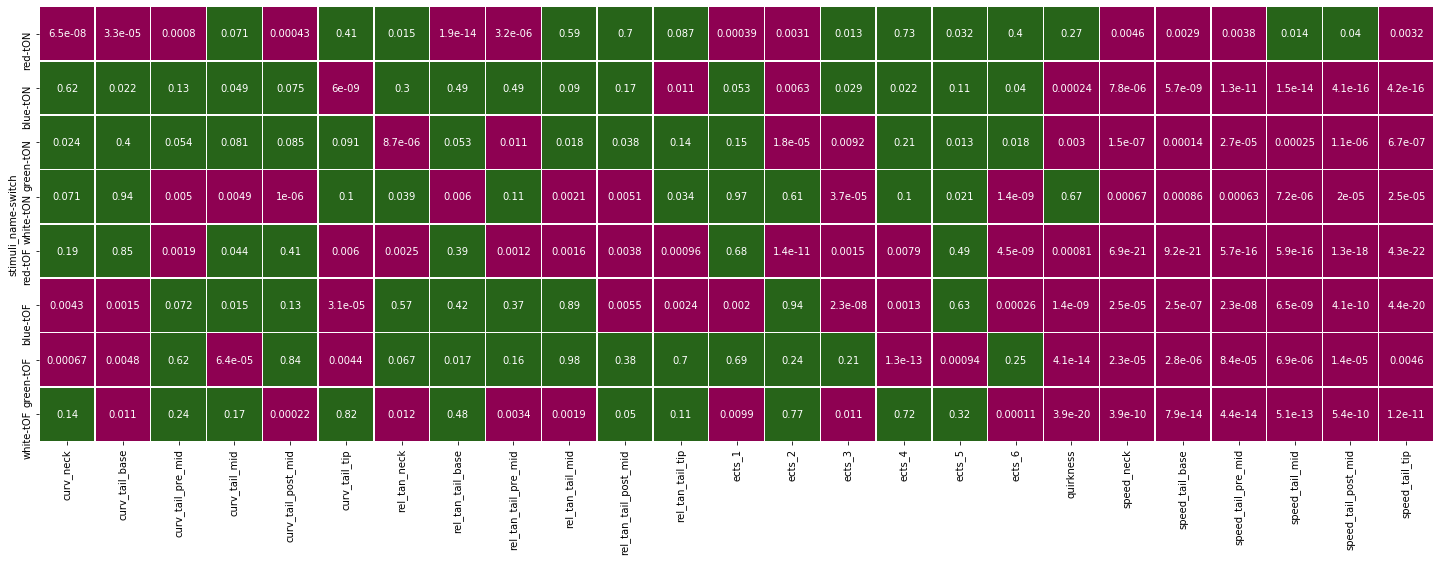

In [31]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_mwu_pval_t1[short_params_list] < 0.05/4,  cmap = 'PiYG_r', linewidths=.5,
            annot = df_mwu_pval_t1[short_params_list], ax= axes, cbar = False)

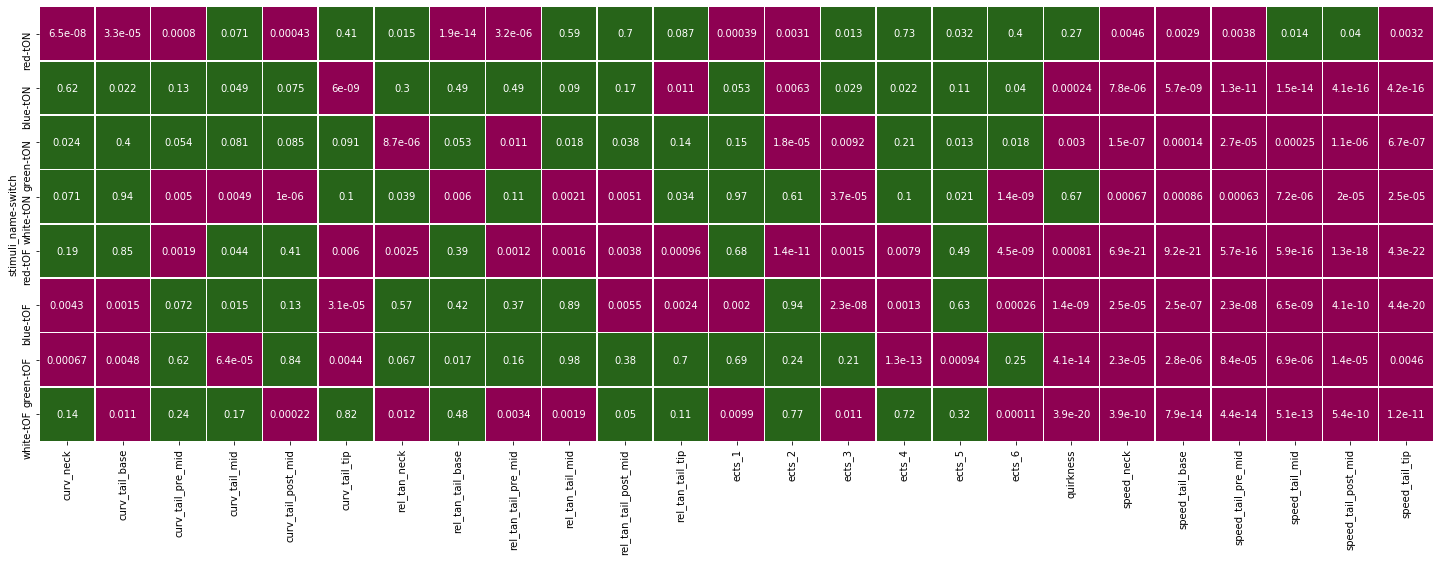

In [32]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_mwu_pval_t1[short_params_list] < 0.05/4,  cmap = 'PiYG_r', linewidths=.5,
            annot = df_mwu_pval_t1[short_params_list], ax= axes, cbar = False)

## test1 

In [69]:
stims = ['red','green','blue','white']
feat_groups = ['curv_','ects_','quirk','rel_tan_','speed_']
body_segments = ['neck','tail_base','tail_pre_mid','tail_mid','tail_post_mid','tail_tip']
switches = ['tON','tOFF']

In [70]:
df_mwu_pval_t1 = pd.read_pickle('./Data/light_screening_stats/pval_two-sided.pickle')
df_mwu_pval_t1l = pd.read_pickle('./Data/light_screening_stats/pval_less.pickle')
df_mwu_pval_t1g = pd.read_pickle('./Data/light_screening_stats/pval_greater.pickle')

In [ ]:
((df_mwu_pval_t1g < 0.05/4) & ~(df_mwu_pval_t1 < 0.05/4)).any(axis=1)

In [ ]:
df_mwu_pval_t1.filter(like='curv').filter(like='ON', axis=0) < 0.05/4

In [ ]:
test_df = df_light_roi[(df_light_roi['stimuli_name']=='blue')&((df_light_roi['stim_stat']=='tONbefore')|(df_light_roi['stim_stat']=='tONafter'))].filter(items=['curv_neck','curv_tail_mid','stim_stat'])

In [ ]:
df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= 'curv')

In [ ]:
sns.violinplot(data = df_melted, x = 'segment', y='curv', split=True, hue='stim_stat')

In [36]:
maxmin_dict = {}
for feat in ['curv_','rel_tan_','speed_', 'ects_', 'quirk']:
    maxmin_dict[feat] = [df_light_roi[short_params_list].filter(like=feat).max().max() , 
                                df_light_roi[short_params_list].filter(like=feat).min().min(),
                        (df_mwu_pval_t1[short_params_list].filter(like =feat) < 0.05/4).sum().sum() ]

In [37]:
maxmin_dict['ects_']

[0.8201652907336991, -0.816167909546339, 20]

In [38]:
ratio_dict = {}
for feat in ['curv_','rel_tan_','speed_', 'ects_', 'quirk']:
        ratio_dict[feat] = (df_mwu_pval_t1[short_params_list].filter(like =feat) < 0.05/4).sum(axis=1).to_list()

In [39]:
maxmin_dict['curv_']

[0.50976294, -0.31073275, 19]

In [ ]:

    
for feat in ['curv_','rel_tan_','speed_']:
#     fig, axes = plt.subplots(1,8, sharey=True, figsize = (40,5))
    fig = plt.figure( figsize = (40,5))
    start = 181
    ind = -1
#     axes = axes.ravel()
    for j, switch in enumerate(switches):
        for i, stim in enumerate(stims):
            ax1 = fig.gca()
#             ind = j*4 + i
            list_significant = []
            for b_seg in body_segments:
                if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                    if df_mwu_pval_t1l.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                        dev = 'less'
                    elif df_mwu_pval_t1g.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                        dev = 'greater'
                    else:
                        dev = 'neither!'
                    list_significant.append(b_seg)

            yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
            if list_significant:
                ind += 1
                if ind !=0:
                    ax = plt.subplot(start+ind, sharey=ax1, aspect = 2*(len(list_significant))/(yrange))
                else:
                    ax = plt.subplot(start+ind, aspect = 2*(len(list_significant))/(yrange))
                    ax1 = ax
                cols_to_select = [(feat + x) for x in list_significant] 
                cols_to_select = cols_to_select + ['stim_stat']
                test_df = df_light_roi[(df_light_roi['stimuli_name']==stim)
                                        &((df_light_roi['stim_stat']==f'{switch}before')
                                          |(df_light_roi['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
                df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
                sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                              ax = ax)
                if stim != 'white':
                    ax.spines['left'].set_color(stim)
                
            print( feat, stim, switch, list_significant)
            
            print('-------')
        print('************')    

In [ ]:

    
for feat in ['curv_','rel_tan_','speed_']:

    for j, switch in enumerate(switches):
        for i, stim in enumerate(stims):
            ax1 = fig.gca()
#             ind = j*4 + i
            list_significant = []
            for b_seg in body_segments:
                if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                    if df_mwu_pval_t1l.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                        dev = 'less'
                    elif df_mwu_pval_t1g.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
                        dev = 'greater'
                    else:
                        dev = 'neither!'
                    list_significant.append(b_seg)

            
                
            print( feat, stim, switch, list_significant)
            
            print('-------')
        print('************')    

In [ ]:
#     fig, axes = plt.subplots(1,8, sharey=True, figsize = (40,5))
    fig = plt.figure( figsize = (40,5))
    start = 181
    ind = -1
#     axes = axes.ravel()
yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
            if list_significant:
                ind += 1
                if ind !=0:
                    ax = plt.subplot(start+ind, sharey=ax1, aspect = 2*(len(list_significant))/(yrange))
                else:
                    ax = plt.subplot(start+ind, aspect = 2*(len(list_significant))/(yrange))
                    ax1 = ax
                cols_to_select = [(feat + x) for x in list_significant] 
                cols_to_select = cols_to_select + ['stim_stat']
                test_df = df_light_roi[(df_light_roi['stimuli_name']==stim)
                                        &((df_light_roi['stim_stat']==f'{switch}before')
                                          |(df_light_roi['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
                df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
                sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                              ax = ax)
                if stim != 'white':
                    ax.spines['left'].set_color(stim)

In [40]:
max_ratio = []
for i in range(8):
    
    max_ratio.append(max(ratio_dict['curv_'][i],ratio_dict['speed_'][i],ratio_dict['rel_tan_'][i]))
max_ratio    

[4, 6, 6, 6, 6, 6, 6, 6]

In [41]:
def get_zscores_test1(param):

    df_param = df_light_roi.groupby(['drug','stimuli_name','stim_stat'])[param].transform(lambda x: np.abs(stats.zscore(x, ddof=1)))
    
    return df_param

In [42]:
df_zscores_test1 = Parallel(n_jobs=30, verbose = 5)(delayed(get_zscores_test1)(param) for param in params_list)


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   9 out of  41 | elapsed:    1.6s remaining:    5.8s
[Parallel(n_jobs=30)]: Done  18 out of  41 | elapsed:    1.7s remaining:    2.2s
[Parallel(n_jobs=30)]: Done  27 out of  41 | elapsed:    1.8s remaining:    0.9s
[Parallel(n_jobs=30)]: Done  36 out of  41 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=30)]: Done  41 out of  41 | elapsed:    1.9s finished


In [43]:
df_combined_zscores_test1 = pd.concat(df_zscores_test1, axis = 1)
df_combined_zscores_test1 

curv_head  speed_head  tan_head  angvel_head  curv_neck  speed_neck  tan_neck  angvel_neck  curv_tail_base  speed_tail_base  tan_tail_base  angvel_tail_base  curv_tail_pre_mid  speed_tail_pre_mid  tan_tail_pre_mid  angvel_tail_pre_mid  curv_tail_mid  speed_tail_mid  tan_tail_mid  angvel_tail_mid  curv_tail_post_mid  speed_tail_post_mid  tan_tail_post_mid  angvel_tail_post_mid  curv_tail_tip  speed_tail_tip  tan_tail_tip  angvel_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness
13710    0.928989    0.193312  0.234993     0.072429   0.470479    0.264752  0.405240     0.452453        1.137672         0.145555       0.481469          0.087231           1.459355            0.112921          0.747907             0.316093       0.312477        0.277841      0.934322         0.137100            0.284104             0.289241           0.938480              0.016037       0.133547        0.273024      0.993193         0.039642      0.341244           0.246770              0.511647          0.672971               0.681976          0.688250  1.084220  0.681602  0.028428  0.328707  0.503184  0.239479   0.167530
13711    0.709310    0.042615  0.232678     0.003914   0.592099    0.234424  0.284933     0.194247        1.316957         0.004258       0.505526          0.048672           1.174319            0.090366          0.801462             0.149196       0.389164        0.165755      0.907945         0.052053            0.298407             0.115743           0.958181              0.034240       0.106492        0.275256      0.997911         0.008663      0.095512           0.273875              0.567782          0.649858               0.703216          0.694687  1.094228  0.481277  0.075938  0.519619  0.541983  0.228671   0.159269
13712    1.071302    0.006443  0.212848     0.034884   0.767768    0.083117  0.210287     0.121090        1.301584         0.269052       0.532830          0.055589           1.070912            0.276760          0.810058             0.021892       0.182749        0.210756      0.892235         0.031815            0.393367             0.150773           0.925779              0.059541       0.074468        0.405282      0.931210         0.103740      0.017571           0.322722              0.596611          0.653665               0.690862          0.652201  1.127142  0.925567  0.364406  0.651018  0.305092  0.247019   0.162469
13713    1.179051    0.368643  0.208873     0.006850   0.893859    0.363167  0.301803     0.145129        1.315083         0.272153       0.515502          0.039454           1.035279            0.429276          0.813951             0.008579       0.257852        0.328782      0.902559         0.017583            0.319903             0.322114           0.971145              0.080436       0.070240        0.378716      1.014432         0.132213      0.181636           0.309129              0.604569          0.667362               0.738476          0.731715  1.155687  0.898392  0.480534  0.735966  0.320180  0.097160   0.149446
13714    0.991281    0.289461  0.231392     0.039998   0.740193    0.488062  0.402384     0.159652        1.403588         0.439492       0.514654          0.004361           0.808566            0.290486          0.833197             0.052048       0.390998        0.195323      0.895805         0.014822            0.314428             0.030365           0.922678              0.088458       0.148105        0.225276      1.014560         0.001438      0.343003           0.284588              0.600957          0.639430               0.670153          0.711046  1.111888  0.898953  0.316213  0.604901  0.179315  0.429857   0.158358
...           ...         ...       ...          ...        ...         ...       ...          ...             ...              ...            ...               ...                ...                 ... 

In [87]:
df_light_roi[short_params_list] = df_light_roi[df_combined_zscores_test1 <3][short_params_list]

In [88]:
df_light_roi

frames                                           filename  drug  light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  speed_head  tan_head  angvel_head  curv_neck  speed_x_neck  speed_y_neck  speed_neck  tan_neck  angvel_neck  curv_tail_base  speed_x_tail_base  speed_y_tail_base  speed_tail_base  tan_tail_base  angvel_tail_base  curv_tail_pre_mid  speed_x_tail_pre_mid  speed_y_tail_pre_mid  speed_tail_pre_mid  tan_tail_pre_mid  angvel_tail_pre_mid  curv_tail_mid  speed_x_tail_mid  speed_y_tail_mid  speed_tail_mid  tan_tail_mid  angvel_tail_mid  curv_tail_post_mid  speed_x_tail_post_mid  speed_y_tail_post_mid  speed_tail_post_mid  tan_tail_post_mid  angvel_tail_post_mid  curv_tail_tip  speed_x_tail_tip  speed_y_tail_tip  speed_tail_tip  tan_tail_tip  angvel_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150
13710      601  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.023145      1.236145     -0.241211    1.259459  2.551674     0.059241  -0.004713     -0.223450     -0.887573    0.915268  2.375096    -0.397794       -0.018581           1.409058          -0.240051         1.429359       2.536753          0.055973          -0.021026              0.000000             -1.936523            1.936523          2.144520             0.157546      -0.000080          0.193054         -1.000000        1.018464      1.940250        -0.106591           -0.001115               0.352173              -0.889526             0.956704           1.978671             -0.013987       0.002184          0.402344         -1.000000        1.077906      1.944154        -0.034760     -0.176577          -0.014920             -0.407153         -0.611424              -0.573003         -0.607520 -0.066543 -0.062467  0.014700  0.021496  0.021350 -0.006849   0.988000       True
13711      602  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.019367     -2.250488      1.000000    2.462661  2.555013     0.003340  -0.006732     -2.000000      0.205139    2.010493  2.544004     0.168908       -0.021948          -1.831482           0.662476         1.947614       2.502892         -0.033862          -0.016443             -1.000000              1.802063            2.060930          2.068350            -0.076170      -0.001356         -1.078674          1.248047        1.649594      1.978598         0.038348           -0.001358              -1.309204               1.309204             1.851494           1.949931             -0.028740      -0.002882         -0.361267          0.999023        1.062338      1.937433        -0.006721     -0.011009          -0.052122             -0.486663         -0.576415              -0.605082         -0.617580 -0.067294 -0.049114  0.017186  0.028498  0.022477 -0.006600   0.987511       True
13712      603  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.025593      2.238831     -0.421631    2.278187  2.583621     0.028608  -0.009648      1.071472     -0.760254    1.313788  2.648805     0.104801       -0.021660           0.708618          -0.708618         1.002137       2.464458         -0.038434          -0.014781              0.527893             -0.887695            1.032799          2.056126            -0.012225       0.002078          1.000000         -0.974365        1.396205      2.001439         0.022841           -0.002970               1.181458              -1.181458             1.670833           1.997199              0.047268       0.000937          0.000000         -0.155396        0.155396      2.032445         0.095012      0.065184          -0.119164             -0.527496         -0.582183              -0.586422         -0.551176 -0.069765 -0.078728  0.032280  0.033317  0.015592 -0.007022   0.987701       True
13713      604  2018

In [ ]:
df_mwu_pval_t1.loc['red']

In [ ]:
df_light_roi.apply(lambda x: )

In [ ]:
red_indexerer = df_light_roi[df_light_roi['stimuli_name'] == 'red'].index
tONb_indexerer = df_light_roi[df_light_roi['stim_stat'] == 'tONbefore'].index

In [ ]:
red_indexerer

In [ ]:
tONb_indexerer

In [ ]:
red_indexerer & tONb_indexerer

In [ ]:
df_light_roi.loc[red_indexerer & tONb_indexerer]

In [45]:
for i in df_mwu_pval_t1.index:
    
    j = i[0]
    k = i[1]
    
    if k == 'tOF':
        m = 'tOFF'
    else:
        m = k
        
    stim_indexerer = df_light_roi[df_light_roi['stimuli_name'] == j].index
    switch1_indexerer = df_light_roi[df_light_roi['stim_stat'] == f'{m}before'].index
    switch2_indexerer = df_light_roi[df_light_roi['stim_stat'] == f'{m}after'].index
    index_obj1 = (stim_indexerer & switch1_indexerer) 
    index_obj2 = (stim_indexerer & switch2_indexerer)
#     print(df_light_roi.loc[index_obj][param])
    for param in short_params_list:
        if (df_mwu_pval_t1[param].loc[j,k]) > 0.05/4:
            
            ex_ind1 = index_obj1
            par_ = param
            
            df_light_roi.at[index_obj1,param] = np.nan
            df_light_roi.at[index_obj2,param] = np.nan
            

In [46]:
df_light_roi

frames                                           filename  drug  light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  speed_head  tan_head  angvel_head  curv_neck  speed_x_neck  speed_y_neck  speed_neck  tan_neck  angvel_neck  curv_tail_base  speed_x_tail_base  speed_y_tail_base  speed_tail_base  tan_tail_base  angvel_tail_base  curv_tail_pre_mid  speed_x_tail_pre_mid  speed_y_tail_pre_mid  speed_tail_pre_mid  tan_tail_pre_mid  angvel_tail_pre_mid  curv_tail_mid  speed_x_tail_mid  speed_y_tail_mid  speed_tail_mid  tan_tail_mid  angvel_tail_mid  curv_tail_post_mid  speed_x_tail_post_mid  speed_y_tail_post_mid  speed_tail_post_mid  tan_tail_post_mid  angvel_tail_post_mid  curv_tail_tip  speed_x_tail_tip  speed_y_tail_tip  speed_tail_tip  tan_tail_tip  angvel_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3  ects_4  ects_5    ects_6  quirkness  light_150
13710      601  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.023145      1.236145     -0.241211    1.259459  2.551674     0.059241        NaN     -0.223450     -0.887573    0.915268  2.375096    -0.397794             NaN           1.409058          -0.240051         1.429359       2.536753          0.055973                NaN              0.000000             -1.936523            1.936523          2.144520             0.157546            NaN          0.193054         -1.000000        1.018464      1.940250        -0.106591                 NaN               0.352173              -0.889526             0.956704           1.978671             -0.013987       0.002184          0.402344         -1.000000        1.077906      1.944154        -0.034760           NaN                NaN                   NaN               NaN                    NaN         -0.607520       NaN -0.062467       NaN     NaN     NaN       NaN   0.988000       True
13711      602  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.019367     -2.250488      1.000000    2.462661  2.555013     0.003340        NaN     -2.000000      0.205139    2.010493  2.544004     0.168908             NaN          -1.831482           0.662476         1.947614       2.502892         -0.033862                NaN             -1.000000              1.802063            2.060930          2.068350            -0.076170            NaN         -1.078674          1.248047        1.649594      1.978598         0.038348                 NaN              -1.309204               1.309204             1.851494           1.949931             -0.028740      -0.002882         -0.361267          0.999023        1.062338      1.937433        -0.006721           NaN                NaN                   NaN               NaN                    NaN         -0.617580       NaN -0.049114       NaN     NaN     NaN       NaN   0.987511       True
13712      603  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.025593      2.238831     -0.421631    2.278187  2.583621     0.028608        NaN      1.071472     -0.760254    1.313788  2.648805     0.104801             NaN           0.708618          -0.708618         1.002137       2.464458         -0.038434                NaN              0.527893             -0.887695            1.032799          2.056126            -0.012225            NaN          1.000000         -0.974365        1.396205      2.001439         0.022841                 NaN               1.181458              -1.181458             1.670833           1.997199              0.047268       0.000937          0.000000         -0.155396        0.155396      2.032445         0.095012           NaN                NaN                   NaN               NaN                    NaN         -0.551176       NaN -0.078728       NaN     NaN     NaN       NaN   0.987701       True
13713      604  20181205_164105_1_5m

In [ ]:
df_light_roi.loc[ex_ind1][par_]

In [47]:
df_light_roi.set_index(['stimuli_name', 'stim_stat']).isna().groupby(['stimuli_name', 'stim_stat']).count()[short_params_list]

curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip  ects_1  ects_2  ects_3  ects_4  ects_5  ects_6  quirkness  speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
stimuli_name stim_stat                                                                                                                                                                                                                                                                                                                                                                                    
blue         tOFFafter        1173            1173               1173           1173                1173           1173          1173               1173                  1173              1173                   1173              1173    1173    1173    1173    1173    1173    1173       1173        1173             1173                1173            1173                 1173            1173
             tOFFbefore       5086            5086               5086           5086                5086           5086          5086               5086                  5086              5086                   5086              5086    5086    5086    5086    5086    5086    5086       5086        5086             5086                5086            5086                 5086            5086
             tONafter         1583            1583               1583           1583                1583           1583          1583               1583                  1583              1583                   1583              1583    1583    1583    1583    1583    1583    1583       1583        1583             1583                1583            1583                 1583            1583
             tONbefore        6148            6148               6148           6148                6148           6148          6148               6148                  6148              6148                   6148              6148    6148    6148    6148    6148    6148    6148       6148        6148             6148                6148            6148                 6148            6148
green        tOFFafter        1404            1404               1404           1404                1404           1404          1404               1404                  1404              1404                   1404              1404    1404    1404    1404    1404    1404    1404       1404        1404             1404                1404            1404                 1404            1404
             tOFFbefore       6261            6261               6261           6261                6261           6261          6261               6261                  6261              6261                   6261              6261    6261    6261    6261    6261    6261    6261       6261        6261             6261                6261            6261                 6261            6261
             tONafter         2472            2472               2472           2472                2472           2472          2472               2472                  2472              2472                   2472              2472    2472    2472    2472    2472    2472    2472       2472        2472             2472                2472            2472                 2472            2472
             tONbefore       10035           10035              10035          10035               10035          10035         10035              10035                 10035             10035                  10035             10035   10035   10035   10035   10035   10035   10035      10035       10035            10035               10035           10035                10035           10035
red          tOFFafter        1497            1497               1497      

In [48]:
df_light_roi.set_index(['stimuli_name', 'stim_stat']).isna().groupby(['stimuli_name', 'stim_stat']).sum()[short_params_list]

curv_neck  curv_tail_base  curv_tail_pre_mid  curv_tail_mid  curv_tail_post_mid  curv_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip  ects_1  ects_2  ects_3  ects_4  ects_5  ects_6  quirkness  speed_neck  speed_tail_base  speed_tail_pre_mid  speed_tail_mid  speed_tail_post_mid  speed_tail_tip
stimuli_name stim_stat                                                                                                                                                                                                                                                                                                                                                                                    
blue         tOFFafter          10              16               1173           1173                1173             17          1173               1173                  1173              1173                     54                 1      12    1173      27      29    1173       6         27          50               42                  47              43                   43              38
             tOFFbefore         28              81               5086           5086                5086             88          5086               5086                  5086              5086                    221               154      76    5086      95     108    5086      46        101         182              189                 217             201                  192             215
             tONafter         1583            1583               1583           1583                1583             37          1583               1583                  1583              1583                   1583                84    1583      52    1583    1583    1583    1583         25          48               39                  43              43                   55              53
             tONbefore        6148            6148               6148           6148                6148            125          6148               6148                  6148              6148                   6148               185    6148     162    6148    6148    6148    6148         93         198              251                 278             265                  276             259
green        tOFFafter          17               9               1404             14                1404             20          1404               1404                  1404              1404                   1404              1404    1404    1404    1404       8       6    1404         26          39               32                  27              30                   33              22
             tOFFbefore         71              29               6261             97                6261            101          6261               6261                  6261              6261                   6261              6261    6261    6261    6261      93      46    6261        118         168              157                 226             229                  186             196
             tONafter         2472            2472               2472           2472                2472           2472            91               2472                   164              2472                   2472              2472    2472      53      51    2472    2472    2472         48          66               81                  93             104                   86              69
             tONbefore       10035           10035              10035          10035               10035          10035           398              10035                   618             10035                  10035             10035   10035     166     211   10035   10035   10035        204         227              285                 334             333                  327             254
red          tOFFafter        1497            1497                 30      

In [49]:
df_light_roi[df_light_roi['stimuli_name'] == 'blue'][short_params_list].isna().sum()

curv_neck                 7769
curv_tail_base            7828
curv_tail_pre_mid        13990
curv_tail_mid            13990
curv_tail_post_mid       13990
curv_tail_tip              267
rel_tan_neck             13990
rel_tan_tail_base        13990
rel_tan_tail_pre_mid     13990
rel_tan_tail_mid         13990
rel_tan_tail_post_mid     8006
rel_tan_tail_tip           424
ects_1                    7819
ects_2                    6473
ects_3                    7853
ects_4                    7868
ects_5                   13990
ects_6                    7783
quirkness                  246
speed_neck                 478
speed_tail_base            521
speed_tail_pre_mid         585
speed_tail_mid             552
speed_tail_post_mid        566
speed_tail_tip             565
dtype: int64

In [50]:
dest_folder_oct18 = '/data/temp/athira/oct18_violinplots_rescaled/light_plots/'

In [74]:
body_segments = ['neck', 'tail_base', 'tail_pre_mid', 'tail_mid', 'tail_post_mid', 'tail_tip']

['neck', 'tail_base', 'tail_pre_mid', 'tail_mid', 'tail_post_mid', 'tail_tip']

In [75]:
df_light_roi

frames                                           filename  drug  light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  speed_head  tan_head  angvel_head  curv_neck  speed_x_neck  speed_y_neck  speed_neck  tan_neck  angvel_neck  curv_tail_base  speed_x_tail_base  speed_y_tail_base  speed_tail_base  tan_tail_base  angvel_tail_base  curv_tail_pre_mid  speed_x_tail_pre_mid  speed_y_tail_pre_mid  speed_tail_pre_mid  tan_tail_pre_mid  angvel_tail_pre_mid  curv_tail_mid  speed_x_tail_mid  speed_y_tail_mid  speed_tail_mid  tan_tail_mid  angvel_tail_mid  curv_tail_post_mid  speed_x_tail_post_mid  speed_y_tail_post_mid  speed_tail_post_mid  tan_tail_post_mid  angvel_tail_post_mid  curv_tail_tip  speed_x_tail_tip  speed_y_tail_tip  speed_tail_tip  tan_tail_tip  angvel_tail_tip  rel_tan_neck  rel_tan_tail_base  rel_tan_tail_pre_mid  rel_tan_tail_mid  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150
13710      601  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.023145      1.236145     -0.241211    1.259459  2.551674     0.059241  -0.004713     -0.223450     -0.887573    0.915268  2.375096    -0.397794       -0.018581           1.409058          -0.240051         1.429359       2.536753          0.055973          -0.021026              0.000000             -1.936523            1.936523          2.144520             0.157546      -0.000080          0.193054         -1.000000        1.018464      1.940250        -0.106591           -0.001115               0.352173              -0.889526             0.956704           1.978671             -0.013987       0.002184          0.402344         -1.000000        1.077906      1.944154        -0.034760     -0.176577          -0.014920             -0.407153         -0.611424              -0.573003         -0.607520 -0.066543 -0.062467  0.014700  0.021496  0.021350 -0.006849   0.988000       True
13711      602  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.019367     -2.250488      1.000000    2.462661  2.555013     0.003340  -0.006732     -2.000000      0.205139    2.010493  2.544004     0.168908       -0.021948          -1.831482           0.662476         1.947614       2.502892         -0.033862          -0.016443             -1.000000              1.802063            2.060930          2.068350            -0.076170      -0.001356         -1.078674          1.248047        1.649594      1.978598         0.038348           -0.001358              -1.309204               1.309204             1.851494           1.949931             -0.028740      -0.002882         -0.361267          0.999023        1.062338      1.937433        -0.006721     -0.011009          -0.052122             -0.486663         -0.576415              -0.605082         -0.617580 -0.067294 -0.049114  0.017186  0.028498  0.022477 -0.006600   0.987511       True
13712      603  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None  Light         blue  tONbefore   0.025593      2.238831     -0.421631    2.278187  2.583621     0.028608  -0.009648      1.071472     -0.760254    1.313788  2.648805     0.104801       -0.021660           0.708618          -0.708618         1.002137       2.464458         -0.038434          -0.014781              0.527893             -0.887695            1.032799          2.056126            -0.012225       0.002078          1.000000         -0.974365        1.396205      2.001439         0.022841           -0.002970               1.181458              -1.181458             1.670833           1.997199              0.047268       0.000937          0.000000         -0.155396        0.155396      2.032445         0.095012      0.065184          -0.119164             -0.527496         -0.582183              -0.586422         -0.551176 -0.069765 -0.078728  0.032280  0.033317  0.015592 -0.007022   0.987701       True
13713      604  2018

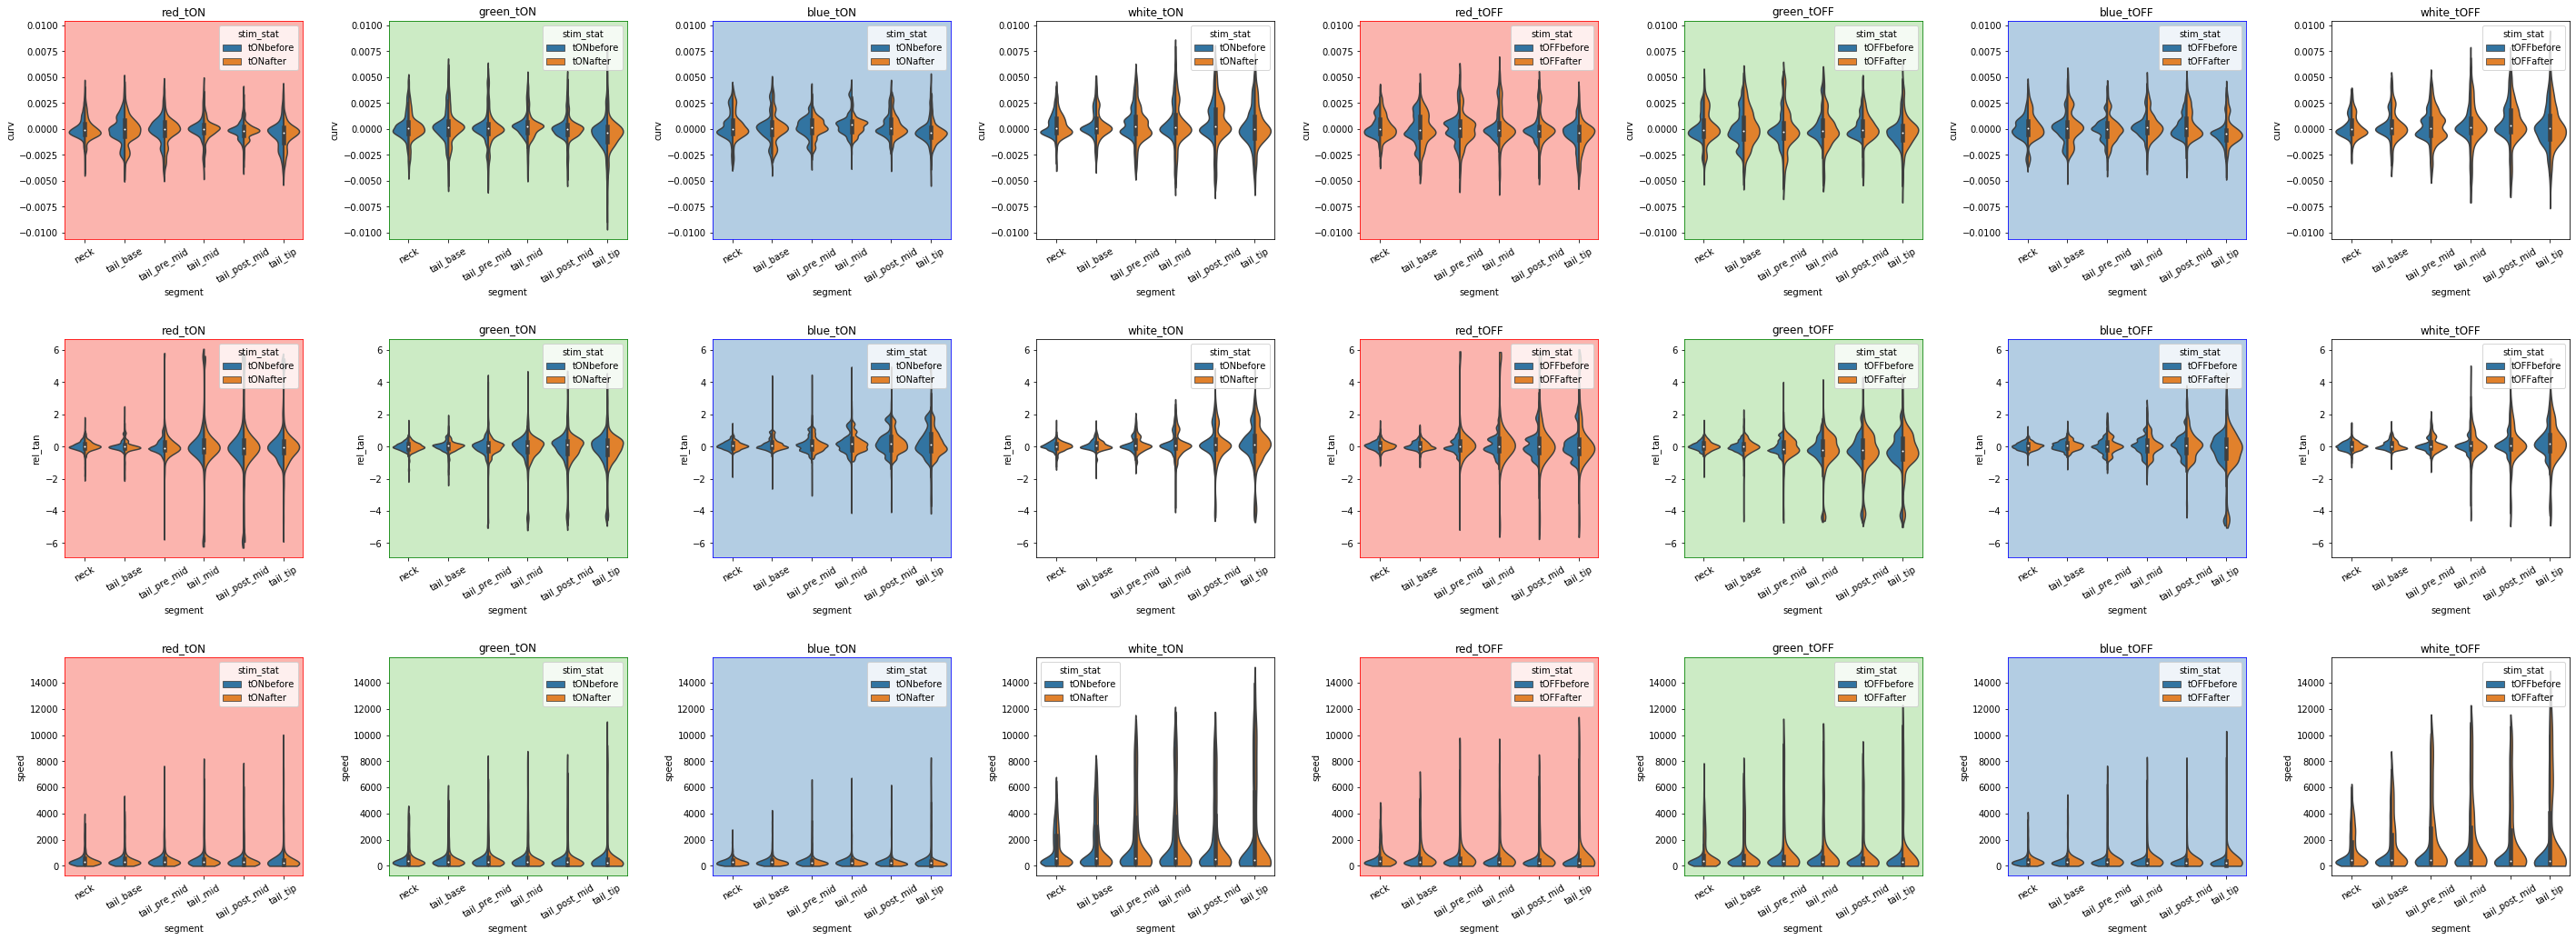

In [90]:
fig, axes = plt.subplots(3,8, sharey= 'row', sharex = 'all',figsize = (40,15),
                         gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1],'height_ratios':[1,1,1]})

body_segments = ['neck', 'tail_base', 'tail_pre_mid', 'tail_mid', 'tail_post_mid', 'tail_tip']
for i, feat in enumerate(['curv_','rel_tan_','speed_']):
    
    
    
    yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
    for j, switch in enumerate(switches):
        for k, stim in enumerate(stims):
            
            ind = j*4 + k
            
            
            # Make the plots
            
            # Find the significant ones
#             list_significant = []
#             for b_seg in body_segments:
#                 if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
# #                     if df_mwu_pval_t1l.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
# #                         dev = 'less'
# #                     elif df_mwu_pval_t1g.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
# #                         dev = 'greater'
# #                     else:
# #                         dev = 'neither!'
#                     list_significant.append(b_seg)

#             if list_significant:
            cols_to_select = [(feat + x) for x in body_segments] 
            df_light_temp = df_light_roi.copy()
            if feat == 'curv_':
                df_light_temp[cols_to_select] = df_light_roi[cols_to_select] * (1/11.56)
            elif feat == 'speed_':
                df_light_temp[cols_to_select] = df_light_roi[cols_to_select] * (346.80)
            else :
                df_light_temp[cols_to_select] = df_light_roi[cols_to_select] *1
                
            cols_to_select = cols_to_select + ['stim_stat']
            test_df = df_light_temp[(df_light_temp['stimuli_name']==stim)
                                    &((df_light_temp['stim_stat']==f'{switch}before')
                                      |(df_light_temp['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
            df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
            sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                          ax = axes[i][ind], scale =  'width', scale_hue= True, cut=0)

            axes[i][ind].xaxis.set_tick_params(labelbottom=True, rotation=30)
            axes[i][ind].set_xticklabels(body_segments)
            axes[i][ind].yaxis.set_tick_params(labelleft=True)
            axes[i][ind].set_title(f'{stim}_{switch}')
#                 for sp in ['top','right']:
#                     axes[i][ind].spines[sp].set_visible(False)
                
#             else:
                
#                 fig.delaxes(axes[i][ind])
            
            if stim != 'white':
                for sp in ['top','bottom', 'left','right']:
                    axes[i][ind].spines[sp].set_color(stim)
                axes[i][ind].set_facecolor(color_lights[k]) 
    
fig.tight_layout(pad=3.0) 
fig.savefig(os.path.join(dest_folder_oct18,'light_test1_violinplots1_all_oct19.svg'))

[7]


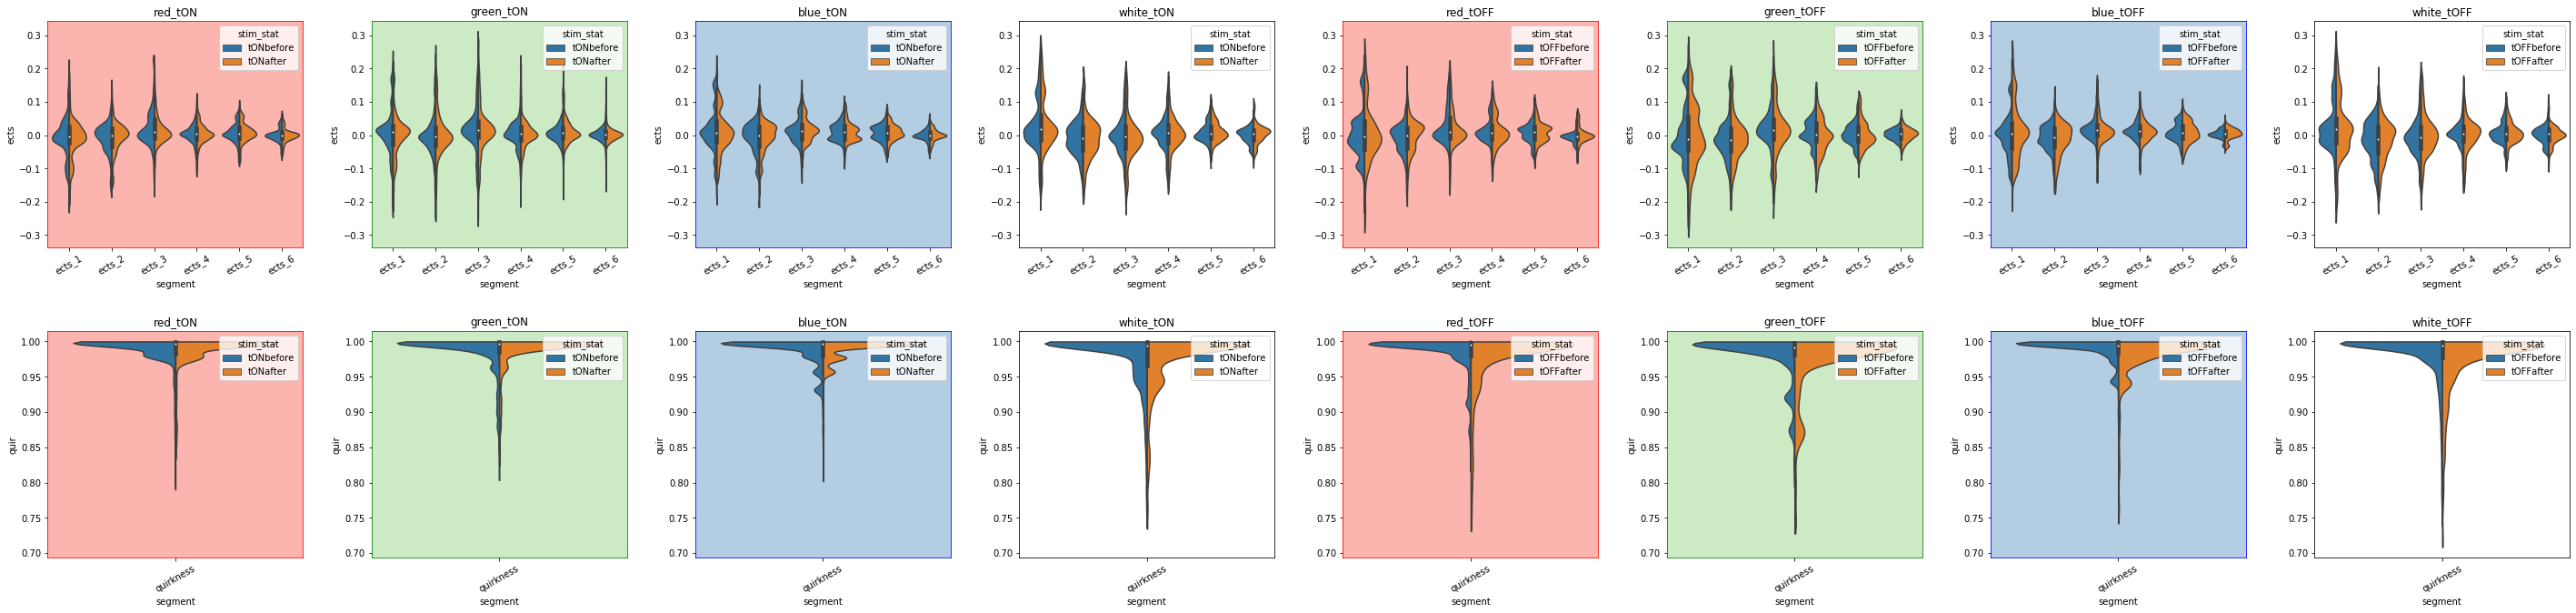

In [91]:
fig, axes = plt.subplots(2,8, sharey= 'row',figsize = (40,10),
                         gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1],'height_ratios':[1,1]})


for i,feat in enumerate(['ects_','quirk']):
# i = 0 
    yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
    for j, switch in enumerate(switches):
        for k, stim in enumerate(stims):

            ind = j*4 + k


            # Make the plots

            # Find the significant ones
            
            body_segments = [str(x) for x in [1,2,3,4,5,6]]
            
            list_significant = []
            bseg_inds = []
            if i == 0:
                for b_seg in [1,2,3,4,5,6]:
                    b_seg = str(b_seg)
                    if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:

                        
                        bseg_inds.append(b_seg)
                list_significant.append([int(b)-1 for b in bseg_inds])
            else:
                if df_mwu_pval_t1.loc[stim,switch[:3]]['quirkness'] < 0.05/4:
                    bseg_inds.append(0)
                    list_significant.append(ind)

#             if list_significant:
            if i == 0:
                cols_to_select = [(feat + x) for x in body_segments] 
            else :
                cols_to_select = ['quirkness']
            cols_to_select = cols_to_select + ['stim_stat']
            test_df = df_light_roi[(df_light_roi['stimuli_name']==stim)
                                    &((df_light_roi['stim_stat']==f'{switch}before')
                                      |(df_light_roi['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
#             display.display(test_df)
            df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
            sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                          ax = axes[i][ind], scale =  'width', scale_hue= True, cut=0 )

            axes[i][ind].xaxis.set_tick_params(labelbottom=True, rotation=30)
#             if i == 0:
#                 axes[i][ind].set_xticklabels([f'ects_{int(b)}' for b in bseg_inds])
            axes[i][ind].yaxis.set_tick_params(labelleft=True)
            axes[i][ind].set_title(f'{stim}_{switch}')
    #                 for sp in ['top','right']:
    #                     axes[i][ind].spines[sp].set_visible(False)

#             else:

#                 fig.delaxes(axes[i][ind])


            

            if stim != 'white':
                for sp in ['top','bottom', 'left','right']:
                    axes[i][ind].spines[sp].set_color(stim)
                axes[i][ind].set_facecolor(color_lights[k]) 

print(list_significant)
fig.tight_layout(pad=3.0) 
fig.savefig(os.path.join(dest_folder_oct18,'light_test1_violinplots2_all_oct19.svg'))

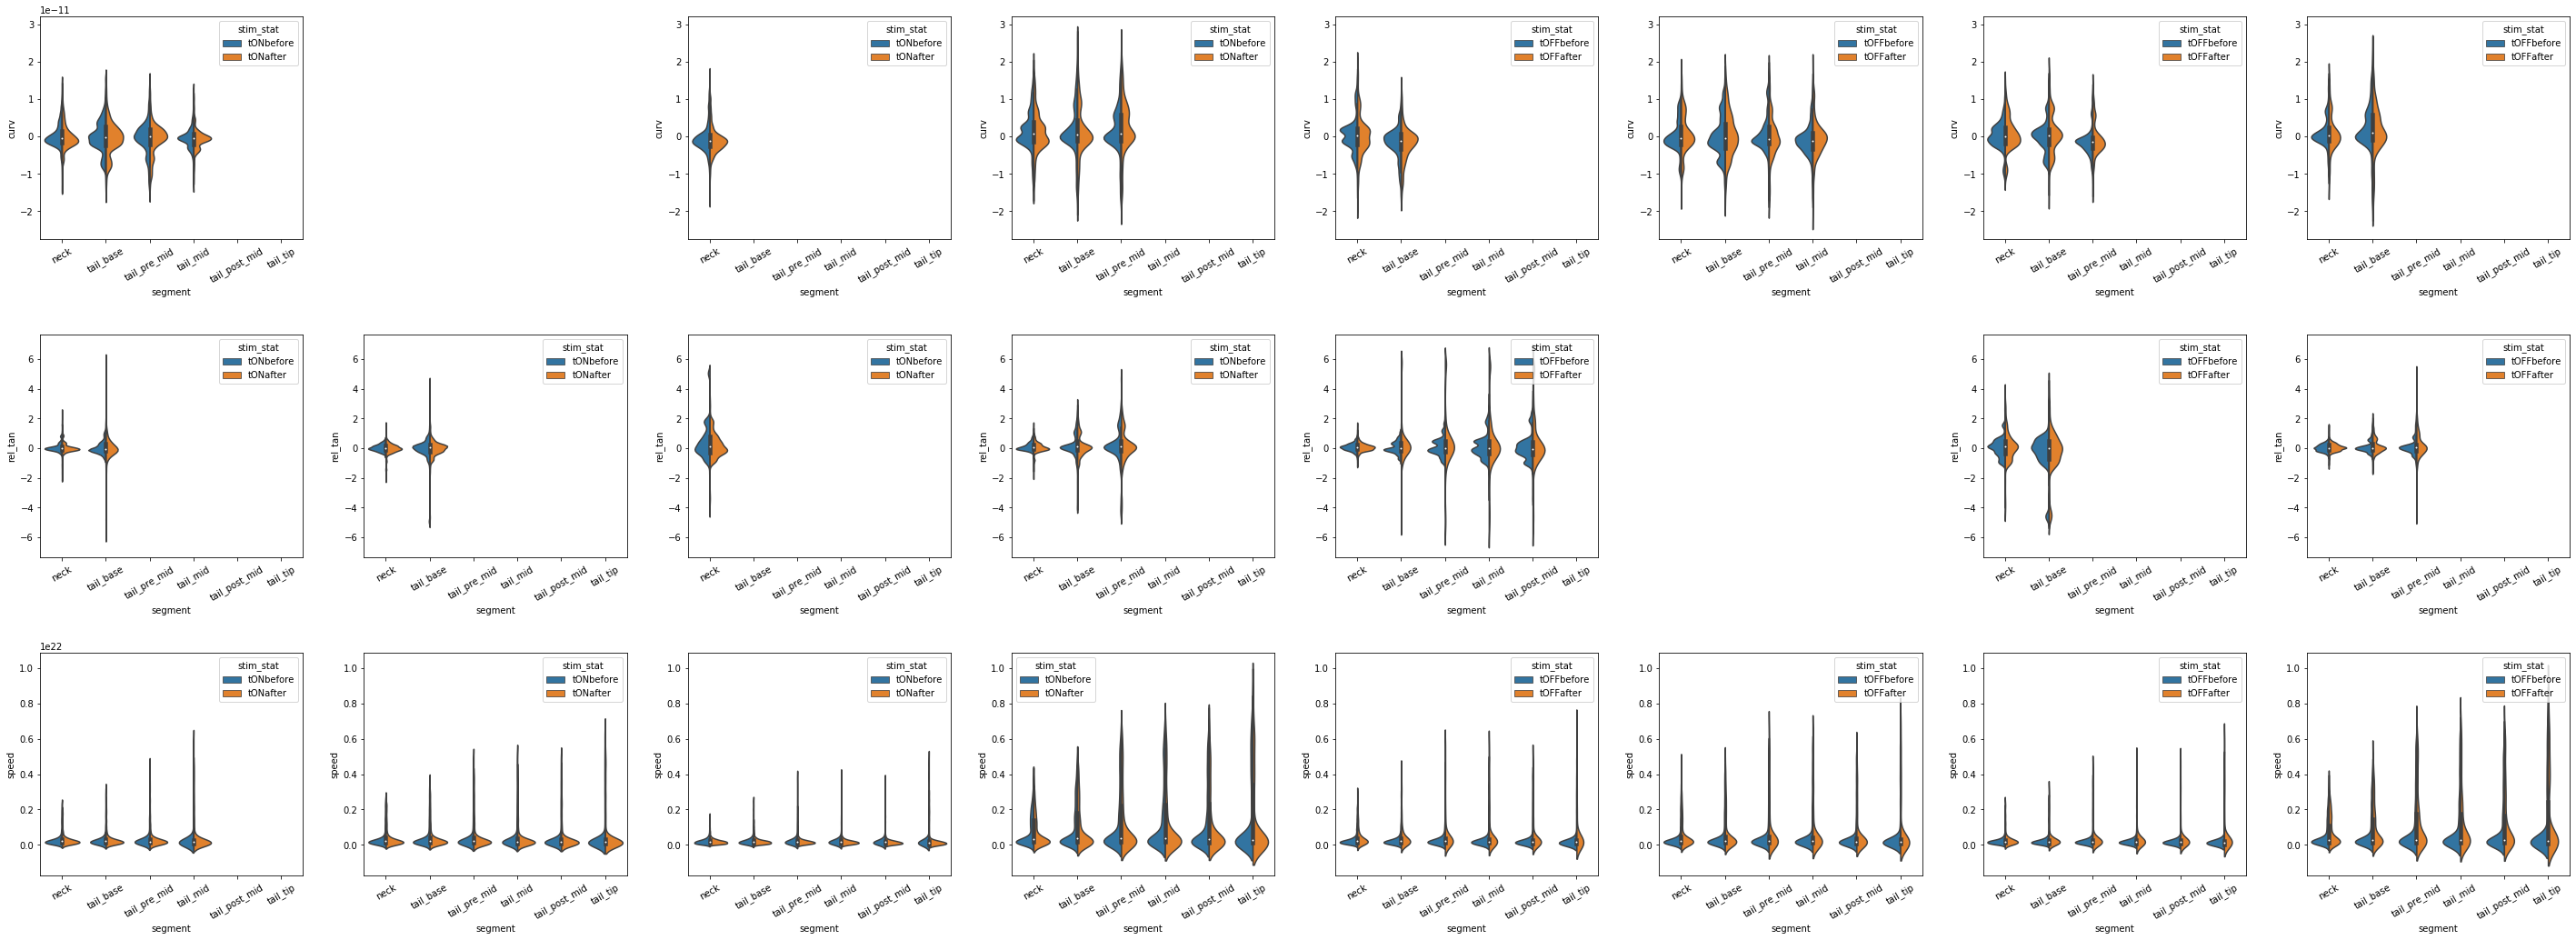

In [59]:
fig, axes = plt.subplots(3,8, sharey= 'row', sharex = 'all',figsize = (40,15),
                         gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1],'height_ratios':[1,1,1]})
for i, feat in enumerate(['curv_','rel_tan_','speed_']):
    
    yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
    for j, switch in enumerate(switches):
        for k, stim in enumerate(stims):
            
            
            # Find the significant ones
            list_significant = []
            for b_seg in body_segments:
                if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                     if df_mwu_pval_t1l.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                         dev = 'less'
#                     elif df_mwu_pval_t1g.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                         dev = 'greater'
#                     else:
#                         dev = 'neither!'
                    list_significant.append(b_seg)
            
            ind = j*4 + k
            
            
            # Make the plots
            if list_significant:
                
                cols_to_select = [(feat + x) for x in list_significant] 
                cols_to_select = cols_to_select + ['stim_stat']
                test_df = df_light_roi[(df_light_roi['stimuli_name']==stim)
                                        &((df_light_roi['stim_stat']==f'{switch}before')
                                          |(df_light_roi['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
                df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
                sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                              ax = axes[i][ind])

                axes[i][ind].xaxis.set_tick_params(labelbottom=True, rotation=30)
                axes[i][ind].set_xticklabels(list_significant)
                axes[i][ind].yaxis.set_tick_params(labelleft=True)
            else:
                
                fig.delaxes(axes[i][ind])

            
fig.tight_layout(pad=3.0) 

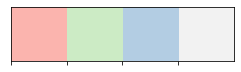

In [52]:
color_lights =  [color_dict[x] for x in stims]
sns.palplot(color_lights)

In [57]:
body_segments

['1', '2', '3', '4', '5', '6']

In [ ]:
df_light_roi

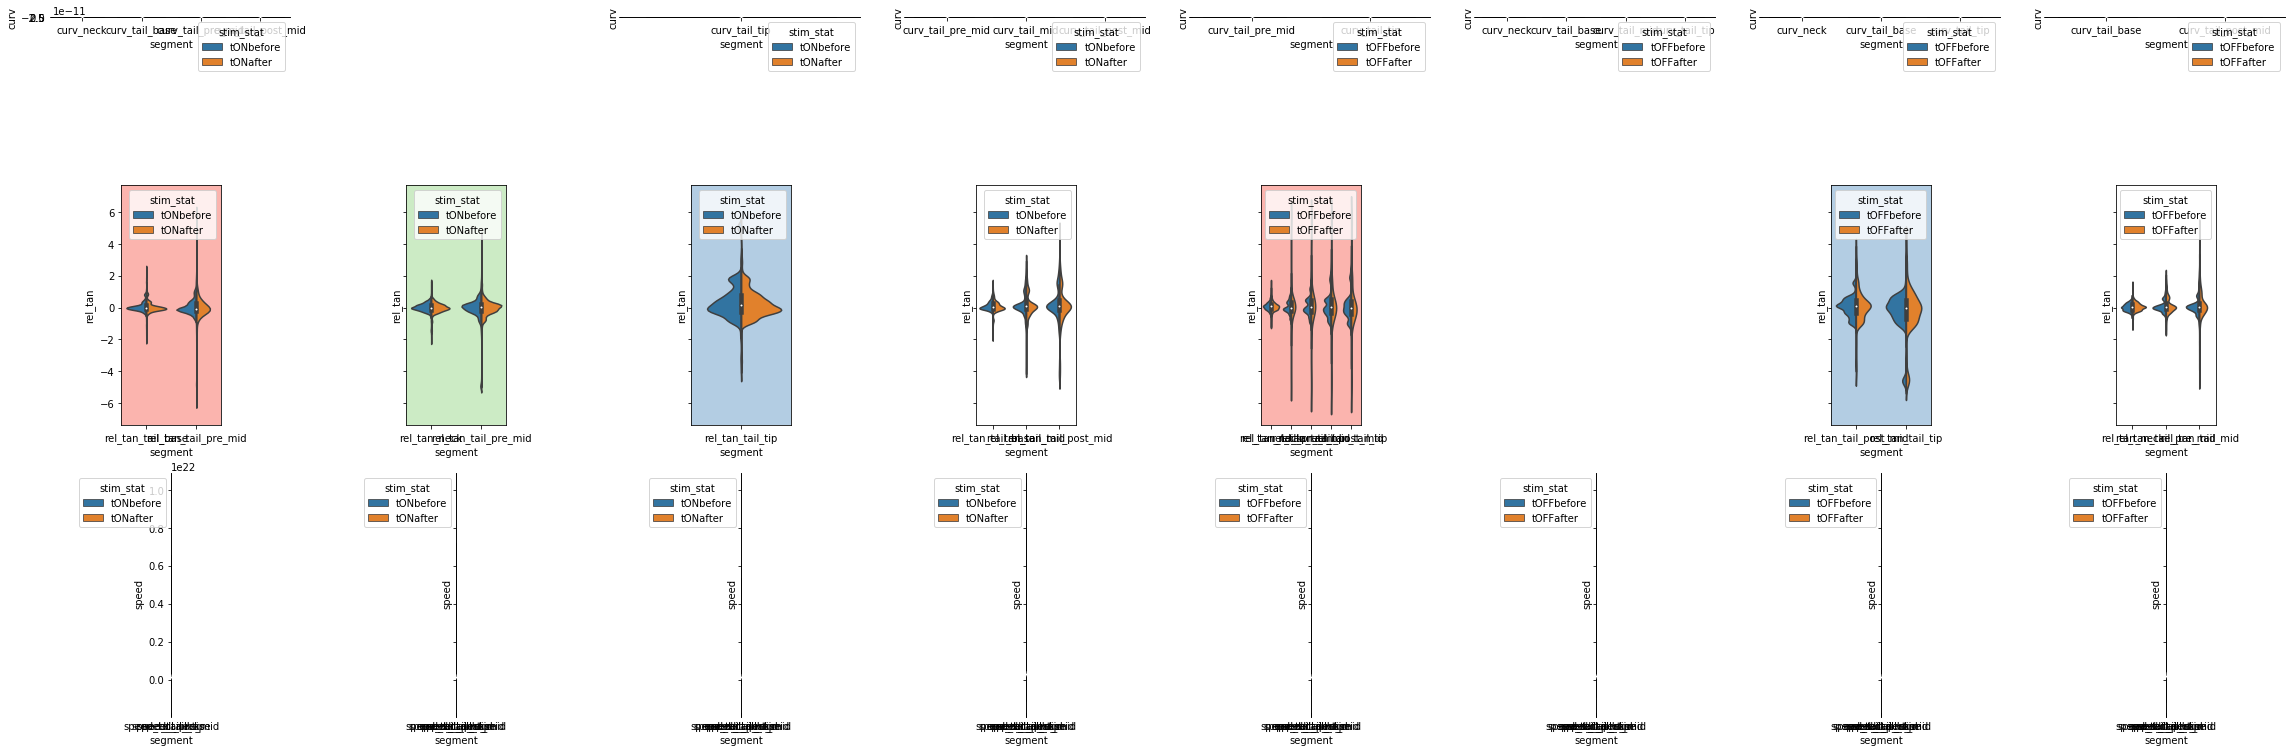

In [60]:
fig, axes = plt.subplots(3,8, sharey= 'row', figsize = (40,15),
                         gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1],'height_ratios':[1,1,1]})
for i, feat in enumerate(['curv_','rel_tan_','speed_']):
    
    yrange  = maxmin_dict[feat][0] - maxmin_dict[feat][1]
    for j, switch in enumerate(switches):
        for k, stim in enumerate(stims):
            
            
            # Find the significant ones
            list_significant = []
            for b_seg in body_segments:
                if df_mwu_pval_t1.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                     if df_mwu_pval_t1l.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                         dev = 'less'
#                     elif df_mwu_pval_t1g.loc[stim,switch[:3]][feat + b_seg] < 0.05/4:
#                         dev = 'greater'
#                     else:
#                         dev = 'neither!'
                    list_significant.append(b_seg)
            
            ind = j*4 + k
            
            
            # Make the plots
            if list_significant:
                
                cols_to_select = [(feat + x) for x in list_significant] 
                cols_to_select = cols_to_select + ['stim_stat']
                test_df = df_light_roi[(df_light_roi['stimuli_name']==stim)
                                        &((df_light_roi['stim_stat']==f'{switch}before')
                                          |(df_light_roi['stim_stat']==f'{switch}after'))].filter(items= cols_to_select)
                df_melted = pd.melt(test_df, id_vars='stim_stat', var_name= 'segment', value_name= feat[:-1])
                sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='stim_stat',
                              ax = axes[i][ind])
                axes[i][ind].set_aspect(2*len(list_significant)/yrange)
            else:
                fig.delaxes(axes[i][ind])
#             axes[0][0].set_aspect(2*4/yrange)
            if stim != 'white':
                for sp in ['top','bottom', 'left','right']:
#                     axes[i][ind].spines[sp].set_color(stim)
                    axes[i][ind].set_facecolor(color_lights[k]) 
                    

# t2 - Fluoxetine white violin plots 

In [158]:
df_mwu_pval_t2 = pd.read_pickle('./Data/light_screening_stats/test2_pval_two-sided.pickle')

In [159]:
df_mwu_pval_t2.set_index(['stimuli_name'],append=True, inplace=True)

In [160]:
df_mwu_pval_t2.index

MultiIndex([(  'Dopamine',   'red'),
            ('Fluoxetine', 'green'),
            (  'Dopamine', 'white'),
            (  'Dopamine',  'blue'),
            ( 'Serotonin', 'green'),
            (  'Dopamine', 'green'),
            ('Fluoxetine',  'blue'),
            ('Fluoxetine', 'white')],
           names=['drug', 'stimuli_name'])

In [161]:
data_t2 = df_mwu_pval_t2.loc['Fluoxetine','white']

In [162]:
display.display(data_t2)

curv_neck                1.483434e-13
curv_tail_base           1.264349e-13
curv_tail_mid            2.630640e-03
curv_tail_post_mid       1.346825e-06
curv_tail_pre_mid        6.271025e-01
curv_tail_tip            7.872418e-01
ects_1                   5.136059e-04
ects_2                   3.656178e-03
ects_3                   3.661616e-06
ects_4                   2.983628e-13
ects_5                   1.102086e-04
ects_6                   3.121945e-06
quirkness                1.635544e-09
rel_tan_neck             6.512828e-01
rel_tan_tail_base        7.377265e-08
rel_tan_tail_mid         3.541567e-09
rel_tan_tail_post_mid    1.403278e-03
rel_tan_tail_pre_mid     7.306324e-09
rel_tan_tail_tip         7.259802e-01
speed_neck               1.875024e-13
speed_tail_base          6.435556e-14
speed_tail_mid           4.977507e-16
speed_tail_post_mid      4.932129e-10
speed_tail_pre_mid       8.171512e-14
speed_tail_tip           1.029071e-09
Name: (Fluoxetine, white), dtype: float64

In [163]:
data_t2 < 0.05

curv_neck                 True
curv_tail_base            True
curv_tail_mid             True
curv_tail_post_mid        True
curv_tail_pre_mid        False
curv_tail_tip            False
ects_1                    True
ects_2                    True
ects_3                    True
ects_4                    True
ects_5                    True
ects_6                    True
quirkness                 True
rel_tan_neck             False
rel_tan_tail_base         True
rel_tan_tail_mid          True
rel_tan_tail_post_mid     True
rel_tan_tail_pre_mid      True
rel_tan_tail_tip         False
speed_neck                True
speed_tail_base           True
speed_tail_mid            True
speed_tail_post_mid       True
speed_tail_pre_mid        True
speed_tail_tip            True
Name: (Fluoxetine, white), dtype: bool

In [121]:
df_light_drugs.stim_stat.unique()

array(['tOFFafter'], dtype=object)

In [164]:
df_light_drugs

frames                                           filename  drug  \
5158      2715  20180808_161109_1_5m0s_AA_None_Light_skeletons...    AA   
5159      2716  20180808_161109_1_5m0s_AA_None_Light_skeletons...    AA   
5160      2717  20180808_161109_1_5m0s_AA_None_Light_skeletons...    AA   
5161      2718  20180808_161109_1_5m0s_AA_None_Light_skeletons...    AA   
5162      2719  20180808_161109_1_5m0s_AA_None_Light_skeletons...    AA   
...        ...                                                ...   ...   
973908    2786  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973909    2787  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973910    2788  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973911    2789  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973912    2790  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   

        light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  \
5158    Light         blue  tOFFafter   0.030811     -0.289185      0.466003   
5159    Light         blue  tOFFafter   0.011807      0.289185     -1.220490   
5160    Light         blue  tOFFafter   0.017421      0.000000      0.629211   
5161    Light         blue  tOFFafter   0.029798     -1.000000      0.246613   
5162    Light         blue  tOFFafter   0.008243      1.000000     -0.875000   
...       ...          ...        ...        ...           ...           ...   
973908  Light        white  tOFFafter   0.002188      0.000000      0.267609   
973909  Light        white  tOFFafter   0.001580      0.000000     -0.803162   
973910  Light        white  tOFFafter  -0.000623      1.000000      0.571991   
973911  Light        white  tOFFafter   0.003051     -1.000000     -0.493103   
973912  Light        white  tOFFafter   0.006982      0.752655     -0.080597   

        speed_head  ...  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1  \
5158      0.548440  ...               0.949966          0.977188  0.057508   
5159      1.254282  ...               0.722838          0.979399  0.065333   
5160      0.629211  ...               0.920079          0.963371  0.060118   
5161      1.029960  ...               0.929799          0.989720  0.056986   
5162      1.328768  ...               0.921823          0.980942  0.065832   
...            ...  ...                    ...               ...       ...   
973908    0.267609  ...              -0.477699         -0.605509 -0.042980   
973909    0.803162  ...              -0.474472         -0.581388 -0.040707   
973910    1.152030  ...              -0.464784         -0.602295 -0.042528   
973911    1.114967  ...              -0.466198         -0.542305 -0.039428   
973912    0.756958  ...              -0.430113         -0.525977 -0.046561   

          ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150  
5158   -0.070164  0.020395  0.080510  0.061081 -0.032849   0.982884       True  
5159   -0.047378 -0.002736  0.057419  0.060112 -0.014973   0.985691       True  
5160   -0.068923  0.018707  0.070598  0.055203 -0.027416   0.983489       True  
5161   -0.067621  0.016323  0.075604  0.062081 -0.041235   0.983043       True  
5162   -0.031286 -0.015069  0.051943  0.074763 -0.022359   0.984966       True  
...          ...       ...       ...       ...       ...        ...        ...  
973908  0.029411  0.002461  0.010022  0.004293  0.002358   0.995317       True  
973909  0.015480  0.004257  0.009787 -0.003440  0.006542   0.995760       True  
973910  0.034120 -0.000616  0.008305  0.011262 -0.001440   0.995242       True  
973911  0.005442 -0.006298  0.005115 -0.012182 -0.006006   0.996124       True  
973912  0.003696  0.018188  0.018658 -0.004694  0.002410   0.995570       True  

[8325 rows x 62 columns]

In [317]:
df_light_t2 = df_light_drugs[(df_light_drugs['stimuli_name'] == 'white')&((df_light_drugs['drug'] == 'None')|(df_light_drugs['drug'] == 'Fluoxetine'))]

In [318]:
df_light_t2.stimuli_name.unique()

array(['white'], dtype=object)

In [319]:
df_light_t2

frames                                           filename        drug  \
78664     2715  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78665     2716  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78666     2717  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78667     2718  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78668     2719  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78669     2720  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78670     2721  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78671     2722  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78672     2723  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78673     2724  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78674     2725  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78675     2726  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78676     2727  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78677     2728  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78678     2729  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78679     2730  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78680     2731  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78681     2732  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78682     2733  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78683     2734  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78684     2735  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78685     2736  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78686     2737  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78687     2738  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78688     2739  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78689     2740  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78690     2741  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78691     2742  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78692     2743  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78693     2744  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78694     2745  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78695     2746  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78696     2747  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78697     2748  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78698     2749  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78699     2750  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78700     2751  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78701     2752  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78702     2753  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78703     2754  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78704     2755  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78705     2756  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78706     2757  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78707     2758  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78708     2759  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78709     2760  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78710     2761  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78711     2762  20181214_095116_1_5m0s_None_None_Light_INVERTE...        None   
78712     2763  20181214_095116_1_5m0s_

In [320]:
display.display(df_light_t2[params_list].isna().any())

curv_head                False
speed_head               False
tan_head                 False
angvel_head              False
curv_neck                False
speed_neck               False
tan_neck                 False
angvel_neck              False
curv_tail_base           False
speed_tail_base          False
tan_tail_base            False
angvel_tail_base         False
curv_tail_pre_mid        False
speed_tail_pre_mid       False
tan_tail_pre_mid         False
angvel_tail_pre_mid      False
curv_tail_mid            False
speed_tail_mid           False
tan_tail_mid             False
angvel_tail_mid          False
curv_tail_post_mid       False
speed_tail_post_mid      False
tan_tail_post_mid        False
angvel_tail_post_mid     False
curv_tail_tip            False
speed_tail_tip           False
tan_tail_tip             False
angvel_tail_tip          False
rel_tan_neck             False
rel_tan_tail_base        False
rel_tan_tail_pre_mid     False
rel_tan_tail_mid         False
rel_tan_

In [321]:
def get_zscores_test2(param):

    df_param = df_light_t2.groupby('drug')[param].transform(lambda x: np.abs(stats.zscore(x, ddof=1)))
    
    return df_param

In [322]:
df_zscores_test2 = Parallel(n_jobs=30, verbose = 5)(delayed(get_zscores_test2)(param) for param in params_list)


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   9 out of  41 | elapsed:    1.7s remaining:    6.0s
[Parallel(n_jobs=30)]: Done  18 out of  41 | elapsed:    1.8s remaining:    2.3s
[Parallel(n_jobs=30)]: Done  27 out of  41 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=30)]: Done  36 out of  41 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=30)]: Done  41 out of  41 | elapsed:    2.0s finished


In [323]:
df_combined_zscores_test2 = pd.concat(df_zscores_test2, axis = 1)
df_combined_zscores_test2

curv_head  speed_head  tan_head  angvel_head  curv_neck  speed_neck  \
78664    0.001171    0.896660  0.646137     0.785664   0.969424    1.241702   
78665    0.278614    0.011834  0.606441     0.049686   0.463317    0.202493   
78666    0.253437    1.402446  1.220175     0.884513   0.557344    0.166707   
78667    0.012986    1.418803  0.414895     1.144231   1.567903    1.752774   
78668    0.442664    0.073149  0.515536     0.150952   0.012074    0.564771   
78669    0.495066    0.992697  1.050801     0.772328   0.482677    0.210268   
78670    0.218940    1.298245  0.277109     1.099070   1.591428    0.911172   
78671    0.106392    0.491919  0.960905     0.984680   2.179270    1.661979   
78672    0.390368    0.487026  0.798679     0.224866   1.113839    0.267022   
78673    0.263364    1.087762  0.472005     0.459974   0.153604    0.948986   
78674    0.167979    1.397775  1.053510     0.838435   0.601982    0.243982   
78675    0.538784    1.898019  0.177744     1.245003   1.202599    0.802351   
78676    0.100696    1.523159  1.020842     1.212432   0.692677    1.042135   
78677    0.613130    1.517789  0.227530     1.127121   0.785523    0.387313   
78678    0.573014    0.211320  0.677543     0.650443   1.533283    1.040392   
78679    0.030549    0.052717  0.517611     0.221586   1.059377    0.776599   
78680    0.172048    0.609845  0.381701     0.187242   0.841672    0.724126   
78681    0.329090    0.472778  0.525548     0.212722   1.325219    0.831285   
78682    0.281106    1.064038  0.194738     0.465887   0.628708    0.148196   
78683    0.055917    1.193603  0.689258     0.714074   0.549991    0.062498   
78684    0.045320    1.746107  0.014278     0.998769   0.680325    0.987401   
78685    0.225230    1.525340  0.821671     1.202211   1.101498    0.287530   
78686    0.203553    1.276785  0.024199     1.202263   1.369438    1.662739   
78687    0.211432    0.918691  0.796754     1.180772   1.840017    1.217742   
78688    0.255444    0.845617  0.103156     0.984562   1.157687    1.728840   
78689    0.378022    0.004043  0.639633     0.774060   2.654815    1.295574   
78690    0.406894    0.109058  0.217603     0.596304   1.706277    0.842945   
78691    0.287758    0.348938  0.368992     0.223506   1.679927    1.355880   
78692    0.130989    0.030641  0.355637     0.012028   1.567611    0.477956   
78693    0.128602    0.486151  0.263363     0.124856   1.317617    0.082601   
78694    0.521983    0.598637  0.439190     0.258444   1.302201    0.291080   
78695    0.107932    0.863935  0.029301     0.578947   1.085306    0.044719   
78696    0.332444    1.282590  0.568335     0.777716   0.708391    0.319336   
78697    0.396671    1.551051  0.046849     0.872454   0.104134    0.092392   
78698    0.375664    1.343737  0.510625     0.804080   0.290121    0.321570   
78699    0.132051    1.612817  0.180108     0.980466   0.392450    0.067693   
78700    0.392360    1.068824  0.597985     1.119495   0.780056    1.217985   
78701    0.080631    1.584150  0.156670     1.071853   1.186539    0.723260   
78702    0.750810    0.548221  0.538667     1.001179   1.626169    1.546197   
78703    0.802906    0.675583  0.133649     0.954133   1.392488    1.245593   
78704    0.458690    0.106944  0.425100     0.805902   1.344094    1.109538   
78705    0.697991    0.655767  0.108242     0.755447   0.119005    0.238309   
78706    0.388691    0.009578  0.123552     0.338459   1.051075    1.410843   
78707    0.170700    0.086689  0.050446     0.097452   1.273157    0.730513   
78708    0.814876    0.570823  0.102776     0.081882   0.542882    1.084419   
78709    1.611778    0.644360  0.137347     0.056493   0.563637    0.843400   
78710    0.461434    1.048594  0.092158     0.321054   1.068255    0.001730   
78711    0.074655    1.052974  0.262426     0.514011   0.585767    0.019464   
78712    0.105542    1.187962  0.146644     0.577776   0.887303    0.460144   
78713    0.029183    1.124522  0.390888     0.775569   0.3

In [172]:
for feat in data_t2.index:

        
    if (data_t2.loc[feat]) > 0.05:
        
        print(feat)

        df_light_t2.loc[:,feat] = np.nan


curv_tail_pre_mid
curv_tail_tip
rel_tan_neck
rel_tan_tail_tip


/share/python-virtual-environments/ciona_behaviour-v2/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [186]:
df_light_t2

frames                                           filename  drug  \
78664     2715  20181214_095116_1_5m0s_None_None_Light_INVERTE...  None   
78665     2716  20181214_095116_1_5m0s_None_None_Light_INVERTE...  None   
78666     2717  20181214_095116_1_5m0s_None_None_Light_INVERTE...  None   
78667     2718  20181214_095116_1_5m0s_None_None_Light_INVERTE...  None   
78668     2719  20181214_095116_1_5m0s_None_None_Light_INVERTE...  None   
...        ...                                                ...   ...   
973908    2786  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973909    2787  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973910    2788  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973911    2789  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973912    2790  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   

        light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  \
78664   Light        white  tOFFafter   0.003752      7.000000     10.929764   
78665   Light        white  tOFFafter   0.007651      5.156433      3.535309   
78666   Light        white  tOFFafter   0.000235    -14.312988     -8.843460   
78667   Light        white  tOFFafter   0.003587     12.597473     11.338974   
78668   Light        white  tOFFafter   0.009938      4.000000      3.927551   
...       ...          ...        ...        ...           ...           ...   
973908  Light        white  tOFFafter   0.002188      0.000000      0.267609   
973909  Light        white  tOFFafter   0.001580      0.000000     -0.803162   
973910  Light        white  tOFFafter  -0.000623      1.000000      0.571991   
973911  Light        white  tOFFafter   0.003051     -1.000000     -0.493103   
973912  Light        white  tOFFafter   0.006982      0.752655     -0.080597   

        speed_head  ...  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1  \
78664    12.979204  ...              -0.597861               NaN -0.073801   
78665     6.251977  ...               0.040744               NaN -0.005261   
78666    16.824637  ...              -2.254942               NaN -0.188387   
78667    16.949002  ...               0.683560               NaN  0.033695   
78668     5.605859  ...               0.795938               NaN  0.059350   
...            ...  ...                    ...               ...       ...   
973908    0.267609  ...              -0.477699               NaN -0.042980   
973909    0.803162  ...              -0.474472               NaN -0.040707   
973910    1.152030  ...              -0.464784               NaN -0.042528   
973911    1.114967  ...              -0.466198               NaN -0.039428   
973912    0.756958  ...              -0.430113               NaN -0.046561   

          ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150  
78664   0.060364  0.106795 -0.106679 -0.032188 -0.021788   0.973970       True  
78665  -0.019388  0.004821  0.020575  0.003724 -0.012113   0.999713       True  
78666  -0.031536 -0.058528 -0.092336  0.001798  0.005701   0.829625       True  
78667   0.100264  0.143100 -0.037101 -0.015529 -0.058954   0.982767       True  
78668  -0.114224 -0.055654  0.087748  0.024686 -0.002240   0.976444       True  
...          ...       ...       ...       ...       ...        ...        ...  
973908  0.029411  0.002461  0.010022  0.004293  0.002358   0.995317       True  
973909  0.015480  0.004257  0.009787 -0.003440  0.006542   0.995760       True  
973910  0.034120 -0.000616  0.008305  0.011262 -0.001440   0.995242       True  
973911  0.005442 -0.006298  0.005115 -0.012182 -0.006006   0.996124       True  
973912  0.003696  0.018188  0.018658 -0.004694  0.002410   0.995570       True  

[1330 rows x 62 columns]

In [324]:
for feat in data_t2.index:
    
    indexer = (df_combined_zscores_test2[df_combined_zscores_test2[feat] > 3]).index
    df_light_t2.loc[indexer][feat] = np.nan

In [325]:
pd.options.display.max_seq_items = 2000

In [326]:
pd.options.display.max_rows = 4000

In [327]:
df_light_t2[short_params_list].shape

(1330, 25)

In [328]:
df_light_t2[short_params_list].count()

curv_neck                1330
curv_tail_base           1330
curv_tail_pre_mid        1330
curv_tail_mid            1330
curv_tail_post_mid       1330
curv_tail_tip            1330
rel_tan_neck             1330
rel_tan_tail_base        1330
rel_tan_tail_pre_mid     1330
rel_tan_tail_mid         1330
rel_tan_tail_post_mid    1330
rel_tan_tail_tip         1330
ects_1                   1330
ects_2                   1330
ects_3                   1330
ects_4                   1330
ects_5                   1330
ects_6                   1330
quirkness                1330
speed_neck               1330
speed_tail_base          1330
speed_tail_pre_mid       1330
speed_tail_mid           1330
speed_tail_post_mid      1330
speed_tail_tip           1330
dtype: int64

In [329]:
df_light_t2[short_params_list].isna().sum()

curv_neck                0
curv_tail_base           0
curv_tail_pre_mid        0
curv_tail_mid            0
curv_tail_post_mid       0
curv_tail_tip            0
rel_tan_neck             0
rel_tan_tail_base        0
rel_tan_tail_pre_mid     0
rel_tan_tail_mid         0
rel_tan_tail_post_mid    0
rel_tan_tail_tip         0
ects_1                   0
ects_2                   0
ects_3                   0
ects_4                   0
ects_5                   0
ects_6                   0
quirkness                0
speed_neck               0
speed_tail_base          0
speed_tail_pre_mid       0
speed_tail_mid           0
speed_tail_post_mid      0
speed_tail_tip           0
dtype: int64

In [342]:
df_light_t2[['quirkness', 'drug']].drug.unique()

array(['None', 'Fluoxetine'], dtype=object)

quirkness        drug
78664    0.973970        None
78665    0.999713        None
78666    0.829625        None
78667    0.982767        None
78668    0.976444        None
78669    0.899204        None
78670    0.964365        None
78671    0.982746        None
78672    0.972911        None
78673    0.941874        None
78674    0.899161        None
78675    0.902377        None
78676    0.957781        None
78677    0.963141        None
78678    0.992775        None
78679    0.988210        None
78680    0.978146        None
78681    0.983075        None
78682    0.956015        None
78683    0.922983        None
78684    0.913118        None
78685    0.915632        None
78686    0.952873        None
78687    0.952237        None
78688    0.972863        None
78689    0.984444        None
78690    0.988208        None
78691    0.995132        None
78692    0.989043        None
78693    0.986981        None
78694    0.978911        None
78695    0.942582        None
78696    0.958743        None
78697    0.929805        None
78698    0.951636        None
78699    0.912261        None
78700    0.921246        None
78701    0.960448        None
78702    0.963329        None
78703    0.972514        None
78704    0.981884        None
78705    0.983270        None
78706    0.994215        None
78707    0.992237        None
78708    0.993365        None
78709    0.983879        None
78710    0.968176        None
78711    0.956610        None
78712    0.954358        None
78713    0.911617        None
78714    0.940970        None
78715    0.917742        None
78716    0.930709        None
78717    0.982672        None
78718    0.954856        None
78719    0.966907        None
78720    0.980012        None
78721    0.988608        None
78722    0.977937        None
78723    0.988385        None
78724    0.990030        None
78725    0.930439        None
78726    0.983361        None
78727    0.882169        None
78728    0.958111        None
78729    0.931499        None
78730    0.922974        None
78731    0.910385        None
78732    0.949642        None
78733    0.936127        None
78734    0.962451        None
78735    0.953946        None
78736    0.960884        None
78737    0.975175        None
156672   0.998954        None
156673   0.998722        None
156674   0.998942        None
156675   0.998785        None
156676   0.998475        None
156677   0.998727        None
156678   0.999118        None
156679   0.998706        None
156680   0.998798        None
156681   0.998924        None
156682   0.998675        None
156683   0.998605        None
156684   0.998739        None
156685   0.998764        None
156686   0.998637        None
156687   0.998640        None
156688   0.998705        None
156689   0.998634        None
156690   0.998999        None
156691   0.999267        None
156692   0.998748        None
156693   0.998941        None
156694   0.999056        None
156695   0.998886        None
156696   0.998881        None
156697   0.998828        None
156698   0.998656        None
156699   0.998749        None
156700   0.998208        None
156701   0.999073        None
156702   0.999176        None
156703   0.998744        None
156704   0.998950        None
156705   0.998934        None
156706   0.998660        None
156707   0.998871        None
156708   0.999017        None
156709   0.999079        None
156710   0.998557        None
156711   0.999030        None
156712   0.998596        None
156713   0.998989        None
156714   0.998677        None
156715   0.998942        None
156716   0.998844        None
156717   0.998809        None
156718   0.998984        None
156719   0.998881        None
156720   0.998868        None
156721   0.998693        None
156722   0.998477        None
156723   0.998879        None
156724   0.998584        None
156725   0.998989        None
156726   0.998718        None
156727   0.998566        None
156728   0.998736        None
156729   0.998733        None
156730   0.998790 

['None' 'Fluoxetine']


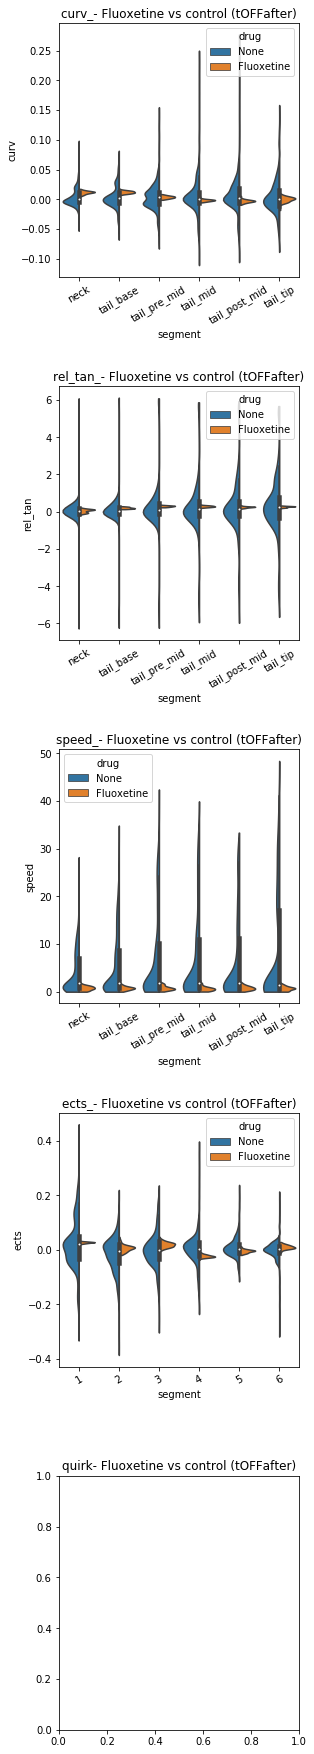

In [349]:
fig, axes = plt.subplots(5,1, figsize = (5,25),
                         gridspec_kw={'height_ratios':5*[1]})


for i,feat in enumerate(['curv_','rel_tan_','speed_','ects_','quirk']):

   
      
    if feat == 'quirk':
        body_segments = ['']
        if df_mwu_pval_t1.loc[stim,switch[:3]]['quirkness'] < 0.05/4:
            cols_to_select = ['quirkness']
            
            
    elif feat == 'ects_':
        body_segments = [str(x) for x in [1,2,3,4,5,6]]
        cols_to_select = [(feat + x) for x in body_segments] 

    else:
        body_segments = ['neck','tail_base','tail_pre_mid','tail_mid','tail_post_mid','tail_tip']
        cols_to_select = [(feat + x) for x in body_segments] 



    cols_to_select = cols_to_select + ['drug']
    test_df = df_light_t2.filter(items= cols_to_select)

    if feat == 'quirk':
        
        test_df1 = df_light_t2[['quirkness', 'drug']]

        display.display(test_df1)
        print(test_df1.drug.unique())


#         sns.violinplot(data = test_df1, x = 'quirkness', split=True, hue='drug',
#                       ax = axes[i], scale =  'width', scale_hue= True, cut=0, hue_order= ['None', 'Fluoxetine'])
        
    else:
        df_melted = pd.melt(test_df, id_vars=['drug'], var_name= 'segment', value_name= feat[:-1])



        sns.violinplot(data = df_melted, x = 'segment', y = feat[:-1], split=True, hue='drug',
                      ax = axes[i], scale =  'width', scale_hue= True, cut=0, hue_order= ['None', 'Fluoxetine'])

        axes[i].set_xticklabels(body_segments)
    

        axes[i].xaxis.set_tick_params(labelbottom=True, rotation=30)
        axes[i].yaxis.set_tick_params(labelleft=True)
    axes[i].set_title(f'{feat}- Fluoxetine vs control (tOFFafter)')
    

# for ax in axes:
#     handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')


                


fig.tight_layout(pad=3.0) 
fig.savefig('./Figures/stats_light/light_test2_violinplots_all_mar10.svg')

## Bubble charts

In [282]:
df_light_roi

frames                                           filename  drug  \
13710      601  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None   
13711      602  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None   
13712      603  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None   
13713      604  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None   
13714      605  20181205_164105_1_5m0s_None_None_Light_INVERTE...  None   
...        ...                                                ...   ...   
973908    2786  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973909    2787  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973910    2788  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973911    2789  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   
973912    2790  20180919_145321_1_5m0s_None_None_Light_INVERTE...  None   

        light stimuli_name  stim_stat  curv_head  speed_x_head  speed_y_head  \
13710   Light         blue  tONbefore   0.023145      1.236145     -0.241211   
13711   Light         blue  tONbefore   0.019367     -2.250488      1.000000   
13712   Light         blue  tONbefore   0.025593      2.238831     -0.421631   
13713   Light         blue  tONbefore   0.027447      0.258301     -0.258301   
13714   Light         blue  tONbefore   0.024217     -0.713928     -0.286072   
...       ...          ...        ...        ...           ...           ...   
973908  Light        white  tOFFafter   0.002188      0.000000      0.267609   
973909  Light        white  tOFFafter   0.001580      0.000000     -0.803162   
973910  Light        white  tOFFafter  -0.000623      1.000000      0.571991   
973911  Light        white  tOFFafter   0.003051     -1.000000     -0.493103   
973912  Light        white  tOFFafter   0.006982      0.752655     -0.080597   

        speed_head  ...  rel_tan_tail_post_mid  rel_tan_tail_tip    ects_1  \
13710     1.259459  ...              -0.573003         -0.607520 -0.066543   
13711     2.462661  ...              -0.605082         -0.617580 -0.067294   
13712     2.278187  ...              -0.586422         -0.551176 -0.069765   
13713     0.365292  ...              -0.658338         -0.675455 -0.071908   
13714     0.769110  ...              -0.555145         -0.643150 -0.068620   
...            ...  ...                    ...               ...       ...   
973908    0.267609  ...              -0.477699         -0.605509 -0.042980   
973909    0.803162  ...              -0.474472         -0.581388 -0.040707   
973910    1.152030  ...              -0.464784         -0.602295 -0.042528   
973911    1.114967  ...              -0.466198         -0.542305 -0.039428   
973912    0.756958  ...              -0.430113         -0.525977 -0.046561   

          ects_2    ects_3    ects_4    ects_5    ects_6  quirkness  light_150  
13710  -0.062467  0.014700  0.021496  0.021350 -0.006849   0.988000       True  
13711  -0.049114  0.017186  0.028498  0.022477 -0.006600   0.987511       True  
13712  -0.078728  0.032280  0.033317  0.015592 -0.007022   0.987701       True  
13713  -0.076917  0.038357  0.036432  0.016031 -0.003580   0.986930       True  
13714  -0.076955  0.029759  0.031625  0.011936 -0.011221   0.987457       True  
...          ...       ...       ...       ...       ...        ...        ...  
973908  0.029411  0.002461  0.010022  0.004293  0.002358   0.995317       True  
973909  0.015480  0.004257  0.009787 -0.003440  0.006542   0.995760       True  
973910  0.034120 -0.000616  0.008305  0.011262 -0.001440   0.995242       True  
973911  0.005442 -0.006298  0.005115 -0.012182 -0.006006   0.996124       True  
973912  0.003696  0.018188  0.018658 -0.004694  0.002410   0.995570       True  

[62848 rows x 62 columns]

In [269]:
df_light_roi[(df_feats["stim_stat"] == 'tONbefore') & (df_feats["stimuli_name"] == 'red')].filter(like='ects_')
df_light_roi[df_feats["stim_stat"] == 'tOFFbefore'].filter(like='ects_')

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6
13710  -0.066543 -0.062467  0.014700  0.021496  0.021350 -0.006849
13711  -0.067294 -0.049114  0.017186  0.028498  0.022477 -0.006600
13712  -0.069765 -0.078728  0.032280  0.033317  0.015592 -0.007022
13713  -0.071908 -0.076917  0.038357  0.036432  0.016031 -0.003580
13714  -0.068620 -0.076955  0.029759  0.031625  0.011936 -0.011221
...          ...       ...       ...       ...       ...       ...
973908 -0.042980  0.029411  0.002461  0.010022  0.004293  0.002358
973909 -0.040707  0.015480  0.004257  0.009787 -0.003440  0.006542
973910 -0.042528  0.034120 -0.000616  0.008305  0.011262 -0.001440
973911 -0.039428  0.005442 -0.006298  0.005115 -0.012182 -0.006006
973912 -0.046561  0.003696  0.018188  0.018658 -0.004694  0.002410

[62848 rows x 6 columns]

In [296]:
test_ects_t1_mean = df_light_roi.groupby(['stimuli_name', 
                        'stim_stat']).mean().reset_index().set_index('stim_stat').filter(items = 
                                                    ['ects_1','ects_2', 'ects_3','ects_4','ects_5', 'ects_6', 'stimuli_name'])
test_ects_t1_std = df_light_roi.groupby(['stimuli_name',
                       'stim_stat']).std().reset_index().set_index('stim_stat').filter(items = 
                                                    ['ects_1','ects_2', 'ects_3','ects_4','ects_5', 'ects_6', 'stimuli_name'])                                   

In [297]:
test_ects_t1_mean

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6  \
stim_stat                                                                
tOFFafter   0.013629 -0.013373  0.012561  0.009907  0.008914  0.004421   
tOFFbefore  0.002164 -0.010265  0.019407  0.013259  0.009161  0.003452   
tONafter    0.008505 -0.004335  0.015458  0.010184  0.008286  0.000088   
tONbefore   0.014536 -0.011723  0.012872  0.011016  0.006510 -0.000772   
tOFFafter  -0.000673 -0.010890  0.015799 -0.003662  0.004266  0.001993   
tOFFbefore  0.000886 -0.012411  0.016876  0.006936  0.004505  0.003289   
tONafter    0.001465  0.002259  0.017851  0.005900  0.012061  0.003800   
tONbefore   0.005147 -0.003591  0.019412  0.005388  0.009677  0.003749   
tOFFafter   0.002185 -0.002122  0.020470  0.010653  0.010238  0.000247   
tOFFbefore  0.003493 -0.009492  0.026792  0.013529  0.008323 -0.004196   
tONafter   -0.013731 -0.006103  0.013749  0.005341  0.008169 -0.000031   
tONbefore  -0.004813 -0.009931  0.023010  0.002830  0.006602  0.000098   
tOFFafter   0.020707 -0.016023  0.000624 -0.000809  0.006256 -0.001359   
tOFFbefore  0.027084 -0.017762 -0.004148  0.001392  0.007965  0.002685   
tONafter    0.031635 -0.008620 -0.009647  0.003268  0.010775  0.004424   
tONbefore   0.031482 -0.009082  0.000488  0.004244  0.008749 -0.001468   

           stimuli_name  
stim_stat                
tOFFafter          blue  
tOFFbefore         blue  
tONafter           blue  
tONbefore          blue  
tOFFafter         green  
tOFFbefore        green  
tONafter          green  
tONbefore         green  
tOFFafter           red  
tOFFbefore          red  
tONafter            red  
tONbefore           red  
tOFFafter         white  
tOFFbefore        white  
tONafter          white  
tONbefore         white

In [294]:
test_ects_t1_mean.loc['tONbefore'].set_index('stimuli_name')

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6
stimuli_name                                                            
blue          0.014536 -0.011723  0.012872  0.011016  0.006510 -0.000772
green         0.005147 -0.003591  0.019412  0.005388  0.009677  0.003749
red          -0.004813 -0.009931  0.023010  0.002830  0.006602  0.000098
white         0.031482 -0.009082  0.000488  0.004244  0.008749 -0.001468

In [295]:
test_ects_t1_mean.loc['tOFFbefore'].set_index('stimuli_name')

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6
stimuli_name                                                            
blue          0.002164 -0.010265  0.019407  0.013259  0.009161  0.003452
green         0.000886 -0.012411  0.016876  0.006936  0.004505  0.003289
red           0.003493 -0.009492  0.026792  0.013529  0.008323 -0.004196
white         0.027084 -0.017762 -0.004148  0.001392  0.007965  0.002685

In [298]:
test_ects_t1_std.loc['tONbefore'].set_index('stimuli_name')

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6
stimuli_name                                                            
blue          0.071228  0.054842  0.045855  0.030808  0.027604  0.019493
green         0.077116  0.066661  0.077412  0.050342  0.039139  0.027240
red           0.067859  0.050443  0.062233  0.034644  0.030837  0.022617
white         0.083800  0.055258  0.066367  0.054816  0.031984  0.024663

In [299]:
test_ects_t1_std.loc['tOFFbefore'].set_index('stimuli_name')

ects_1    ects_2    ects_3    ects_4    ects_5    ects_6
stimuli_name                                                            
blue          0.067546  0.042290  0.041517  0.028625  0.029493  0.014906
green         0.089799  0.064579  0.069882  0.043842  0.034500  0.018012
red           0.075557  0.048744  0.057733  0.041179  0.033677  0.022910
white         0.078564  0.063521  0.064605  0.048452  0.033839  0.031612

In [301]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.collections import PatchCollection

In [306]:
ylabels = ['red','green', 'blue', 'white']
xlabels = ['ects_1','ects_2', 'ects_3','ects_4','ects_5', 'ects_6']

N = len(ylabels)
M = len(xlabels)

Index(['tOFFafter', 'tOFFbefore', 'tONafter', 'tONbefore'], dtype='object', name='stim_stat')

0.02070749559131869 -0.016023487906220584 0.02070749559131869
0.027083644687623126 -0.017762286565798903 0.027083644687623126
0.03163512499827438 -0.013730755861227554 0.03163512499827438
0.03148177952680941 -0.011723211734972537 0.03148177952680941


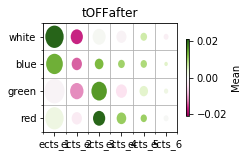

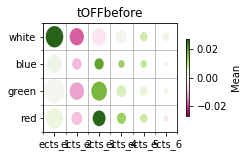

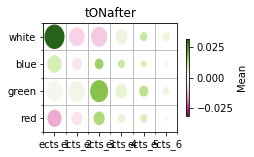

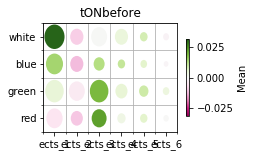

In [316]:

for switch in list(test_ects_t1_mean.index.unique()):

    x, y = np.meshgrid(np.arange(M), np.arange(N))
    s = test_ects_t1_std.loc[f'{switch}'].set_index('stimuli_name').loc[ylabels].filter(like='ects').values
    c = test_ects_t1_mean.loc[f'{switch}'].set_index('stimuli_name').loc[ylabels].filter(like='ects').values

    # s1 = test_ects_t1_std.loc[f'{switch}after'].set_index('stimuli_name').loc[ylabels].values
    # c1 = test_ects_t1_mean.loc[f'{switch}after'].set_index('stimuli_name').loc[ylabels].values

    fig, ax = plt.subplots(figsize = (3,2))

    R = s/s.max()/2
    circles = [plt.Circle((j,i), radius= 0.9*r) for r,j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap='PiYG')
    ax.add_collection(col)
    c_limit = max(-1*c.flatten().min(), c.flatten().max())
    print(c_limit,c.flatten().min(), c.flatten().max())
    col.set_clim(-c_limit, c_limit)
    ax.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.set_title(switch)
    ax.grid(which='minor')

    fig.colorbar(col, shrink=0.7, label='Mean')

In [ ]:
df_skel_file['stim_stat'] = 'None'
    df_skel_file.loc[(df_skel_file['frames'] > (tON-10)*fps)&(df_skel_file['frames'] < tON*fps), 'stim_stat'] = 'tONbefore'
    df_skel_file.loc[(df_skel_file['frames'] >= (tON+0.5)*fps)&(df_skel_file['frames'] <= (tON+3)*fps), 'stim_stat'] = 'tONafter'
                                                                 
    df_skel_file.loc[(df_skel_file['frames'] > (tOFF-10)*fps)&(df_skel_file['frames'] < tOFF*fps), 'stim_stat'] = 'tOFFbefore'
    df_skel_file.loc[(df_skel_file['frames'] >= (tOFF+0.5)*fps)&(df_skel_file['frames'] <= (tOFF+3)*fps), 'stim_stat'] = 'tOFFafter'
    